In [1]:
#@markdown instalacion paqutes
package = ['boto3','es_lemmatizer','pyodbc','prince',
           'pyLDAvis==2.1.2','gensim']
f= open("paquetes.txt","w+")

def install_txt(package):
  f= open("paquetes.txt","w+")
  for i in package:
    print(i)
    

    try:
        __import__(i)
        print('ya instalado {}'.format(i))
    except ImportError:
        # main(['install', package]) 
        f.write("{} \r\n".format(i))
        print('No instalado {}'.format(i))


install_txt(package)
!pip install -r paquetes.txt  

boto3
ya instalado boto3
es_lemmatizer
ya instalado es_lemmatizer
pyodbc
ya instalado pyodbc
prince
ya instalado prince
pyLDAvis==2.1.2
No instalado pyLDAvis==2.1.2
gensim


/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


ya instalado gensim


#**Librerias**

In [2]:
#Librerias
import re
import numpy as np
import pandas as pd
import pandas_profiling
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import unicodedata
from es_lemmatizer import lemmatize
import spacy
import re
import pyodbc
import prince
import os
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import re #expresiones regulares
import itertools
from collections import Counter 
import seaborn as sns
import matplotlib as mpl
plt.style.use('ggplot')
sns.set_context("talk")
import datetime
import dateutil

#Librerias de visualizacion dinámica
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud
from pprint import pprint #Manipulacion de datos

#LDA MODEL FOR OBSERVACIONES
#quitar mas profundamente stop_words
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import unicodedata
import tqdm
import spacy.cli
from spacy.lang.es.stop_words import STOP_WORDS 
#descargamos los modelos
from nltk.corpus import stopwords
nltk.download('stopwords')

nltk.download('punkt')
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
spacy.cli.download("es_core_news_md")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
⚠ Skipping model package dependencies and setting `--no-deps`. You
don't seem to have the spaCy package itself installed (maybe because you've
built from source?), so installing the model dependencies would cause spaCy to
be downloaded, which probably isn't what you want. If the model package has
other dependencies, you'll have to install them manually.
✔ Download and installation successful
You can now load the model

In [3]:
#@title Librerías modelo de LDA
## APLLY LDA MODEL TO OBSERVACIONES
#Gensim para modelado de temas, indexación de documentos y recuperación de similitudes con grandes corpus
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
#Spacy para la lemmatization
import spacy
# Herramientas de graficado
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline
# Habilitado de logging para gensim (opcional)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



In [4]:
#@title Librerías  modelo de Word2Vec
#word2vec modelo de EMBEDDING
#word2vec
from gensim.models import word2vec
import multiprocessing
from gensim.models import Word2Vec
from collections import defaultdict 
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats
from pylab import rcParams
from google.colab import widgets

#**Rutas**

In [5]:
#Rutas en Drive colab
os.getcwd()

'/content'

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
Campaña_P  = "/content/Modelo Analítico PCP - Beneficio Educativo.xlsx"
nombres = "/content/drive/MyDrive/Ecopetro/Estefania/nombres_apellidos.txt"
# Esta es la ruta donde tengo los nombres: Juan Chacón
# nombres = "/content/drive/MyDrive/Américas BPS/Ecopetro/Estefania/nombres_apellidos.txt"

In [8]:
os.chdir('/content/drive/MyDrive/Ecopetro/ECOPETROL_P/2. Solicitud de educación inclusiva')
# Esta es la dirección en el que yo tengo los archivos
# os.chdir('/content/drive/MyDrive/Américas BPS/Ecopetro/ECOPETROL_P/2. Solicitud de educación inclusiva')
os.getcwd()

'/content/drive/MyDrive/Ecopetro/ECOPETROL_P/2. Solicitud de educación inclusiva'

#**Funciones**

In [9]:
# CONEXION A SERVIDOR ###################################################################################
# def Conexion():
#     server = '172.27.48.148'
#     #database = 'bdcmp_NuevaEpsCrm' 
#     username = 'CienciaDatos' 
#     password = 'C13nc1aD47*5'  
#     cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';UID='+username+';PWD='+ password)
#     cursor = cnxn.cursor()
#     return cnxn


# DEFINICION DE PICOS Y FECHAS ##################################################################################
##Se definen fechas para realizar los respectivos filtros 
##cuando se extraiga la información correspondiente desde el servidor

def fechas(df_Tipo_OF):
    df_OF = df_Tipo_OF.astype(str).replace('NaT','20200101')
#######Operaciones financieras
    df_OF ['fecha_ini_1'] = df_OF['Picos de demanda  1'].replace(regex=r'-', value = '').replace('0','20200101')
    df_OF ['fecha_fin_1'] = ['20210401','20210301','20210301','20210301', '20210301', '20210301', '20210401']
    df_OF ['fecha_ini_2'] = df_OF['Picos de demanda  2'].replace(regex=r'-', value = '').replace('0','20200101')
    df_OF ['fecha_fin_2'] = ['20210501', '20210501', '20200101', '20210501', '20200101', '20210501', '20201001']
    df_OF ['fecha_ini_3'] = df_OF['Picos de demanda  3'].replace(regex=r'-', value = '').replace('0','20200101')
    df_OF ['fecha_fin_3'] = ['20210601', '20200101', '20200101', '20210601', '20200101', '20200101', '20210101']
    
    return df_OF  

## EXTRACCIÓN ########################################################################################################

def Extraccion(df_fechas, df_General, picos):
    #df_fechas : Nombre de la tabla con las tipologias seleccionadas y las fechas definidas correspondientes (con la función de fechas)
    #df_general : Nombre de tabla para cada campaña sin las fechas definidas 
    #picos : Número máximo de picos que se analizan [en OF son 2, en P son 3]
    
    query_base = "SELECT * FROM [172.27.90.50].[Ecopetrol_Reporting].[dbo].[Tbl_Ecopetrol_ResultadoBackOffice] "
    
    i = 0 
    cnxn = Conexion()
    query = "WHERE ([fgs_Nivel3] = '"+ df_fechas['Nivel 3'][i] + "') AND ([fgs_FechaInicio] BETWEEN '" + df_fechas['fecha_ini_1'][i]+ "' AND '" + df_fechas['fecha_fin_1'][i] +"')"  
    query_completa = query_base + query
    df_inicial = pd.read_sql(query_completa, cnxn)

    for j in range(1,picos+1):
        df_General["Datos_Pico_"+str(j)] = 0
        for i in range(0,len(df_fechas['Campaña'])):
            cnxn = Conexion()
            query = "WHERE ([fgs_Nivel3] = '"+ df_fechas['Nivel 3'][i] + "') AND ([fgs_FechaInicio] BETWEEN '" + df_fechas["fecha_ini_"+str(j)][i]+ "' AND '" + df_fechas["fecha_fin_"+str(j)][i] +"')"  
            query_completa = query_base + query
            df = pd.read_sql(query_completa, cnxn)
            df_total = pd.concat([df_inicial,df]).drop_duplicates()
            df_inicial = df_total
            df_General["Datos_Pico_"+str(j)][i] = df.shape[0] 
    print('Total de registros:', df_inicial.shape[0])
    print('Total de columnas:', df_inicial.shape[1])
            
    return df_total,df_General                 

# VALORES FALTANTES ###############################################################################################################################################################################################

def Valores_Faltantes(df, porcentaje):
    Faltantes = df.isnull().sum()
    df_Faltantes = pd.DataFrame({'Nombre_Columnas':Faltantes.index, 'Total_Vacios':Faltantes.values})#[df_Faltantes['Total_Vacios'] != 0]
    df_Faltantes = df_Faltantes[df_Faltantes['Total_Vacios'] != 0]

    df_Faltantes['Porcentaje_vacio'] = ((df_Faltantes['Total_Vacios']/df.shape[0])*100).round(2)
    df_Faltantes['Columna_vacia'] = 'NO'
    df_Faltantes.loc[df_Faltantes['Total_Vacios'] == df.shape[0], 'Columna_vacia'] = 'SI'
    
    print('Total columnas con valores faltantes :', df_Faltantes.shape[0])
    print('Total columnas vacias :', df_Faltantes[df_Faltantes['Columna_vacia'] == 'SI'].Columna_vacia.count())
    print('Total columnas no vacias con mas del ' + str(porcentaje) + '% de valores faltantes :', df_Faltantes[(df_Faltantes['Porcentaje_vacio'] >= porcentaje) & (df_Faltantes['Columna_vacia'] == 'NO') ].Columna_vacia.count())
    #print('Total columnas no vacias con menos del ' + str(porcentaje) + '% de valores faltantes :', df_Faltantes[(df_Faltantes['Porcentaje_vacio'] >= porcentaje) & (df_Faltantes['Columna_vacia'] == 'NO') ].Columna_vacia.count())
    
    return df_Faltantes

# ELIMINAR COLUMNAS##############################################################################################

#para eliminar columnas seleccionadas
def Eliminar_columnas(df, lista_columnas):
    df_drop = df.drop(columns = lista_columnas)
    print ('Cantidad de columnas iniciales : ', df.shape[1])
    print ('Cantidad despues de eliminar : ', df_drop.shape[1] )
    return df_drop
### elimincacion 100 valores nulos, cardinalida100, cardinalidad 1
def eliminacion_columnas(tabla):
  cardinalidad100 = tabla[tabla['% de valores diferentes']==100]
  cardinalidad1 = tabla[tabla['# de valores diferentes']==1]
  vacios = tabla[tabla['% de datos nulos']==100]
  variables_eliminar=vacios.index.tolist()+cardinalidad1.index.tolist()+cardinalidad100.index.tolist()# no aportan informacion
  print('numero de variables a eliminar : {}'.format(len(variables_eliminar)))
  return variables_eliminar
# columnas duplicadas
def columnas_dup(df):
    df_dup = df.T.duplicated().T
    return df_dup
#Para eliminar columnas duplicadas
def columnas_nodup(df):
    print ('Total de columnas antes de eliminar dup: ', df.shape[1])
    df_sindup = df.T.drop_duplicates().T
    print ('Total de columnas duplicadas : ', df.shape[1] - df_sindup.shape[1])
    print ('Total de columnas no duplicadas:', df_sindup.shape[1])
    return df_sindup    

def mytable(data):
    nulls = pd.DataFrame(data.isnull().sum()/data.shape[0]*100, columns=['% de datos nulos'])
    ceros = pd.DataFrame((data==0).sum()/data.shape[0]*100, columns=['% de ceros'])
    tipo = pd.DataFrame(data.dtypes,columns=['Tipo de datos'])
    val = pd.DataFrame(data.nunique(),columns=['# de valores diferentes'])
    valpor = pd.DataFrame(data.nunique()/data.shape[0]*100,columns=['% de valores diferentes'])
    mis_val_table = pd.concat([nulls, ceros,tipo, val, valpor], axis=1)
    return mis_val_table

def creacion_tabla(x):
  tabla_x = mytable(x)
  print(x.shape)
  return tabla_x


def nonum(x):
 try:
   int(x)
   sal = False
 except:
    sal = True
 return sal 


def isnum(x):
 try:
   int(x)
   sal = True
 except:
    sal = False
 return sal 

def solo_num(x):
  try:
    sal = float(x)
  except:
    sal = np.nan
  return sal 
def creacion_tabla(x):
  tabla_x = mytable(x)
  print(x.shape)
  return tabla_x





#esta funcion quita stop words de cada una de las filas
def text_rows(texto, StopWords):
    texto = texto.split()
    resultwords  = [word for word in texto if word not in StopWords]
    texto = ' '.join(resultwords)
    return texto


def text (column, dic):
    column = column.astype(str)
    texto_base = " ".join(motivo for motivo in column)
    text = (unicodedata.normalize('NFKD', texto_base).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    text = re.sub(r"\bmedicas\b","medica",text)
    for i, j in dic.items():
        text = text.replace(i, j)
        
    return text
    
def listas (column, dic):
    Lista = []
    column = columna.astype(str)
    for motivo in column:
        inicial_answer = str(motivo)
        for i, j in dic.items():
            ini_answer = inicial_answer.replace(i, j)
        answer = (unicodedata.normalize('NFKD', ini_answer).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
        answer = re.sub(r"\bmedicas\b","medica",answer)
        answer = re.sub(r"\bmedicamentos\b","medicamento",answer)
        answer = re.sub(r'[^\w\s]','', answer).split()
        words = [word for word in answer if word not in stop_words]
        Lista.append(words)
    return Lista
    
#crea nube de palabras
def wordcloud(text, nombre, stopWords):
    # wordcloud = WordCloud(stopwords=stop_words+stopWords, background_color="white", width=1600, height=800,min_word_length =3 ).generate(text)
    wordcloud = WordCloud(stopwords=stop_words+stopWords, background_color="white", width=1600, height=800).generate(text)
    plt.figure( figsize=(15,10) )
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    plt.savefig("word_cloud_"+str(nombre)+".png") #dpi = 300)    

#crea n-gramas   
def ngrams(text, n, top,stopWords):
    #wnl = nltk.stem.WordNetLemmatizer()
    texto = re.sub(r'[^\w\s]','', text).split()
    stopwords = stop_words + stopWords
    words = [word for word in texto if word not in stopwords]
    
    n_grams_series = ((pd.Series(nltk.ngrams(words,n)).value_counts())[:top])
    plot = n_grams_series.sort_values().plot.barh(color ="tomato", width = 0.6, figsize = (20,18), edgecolor='grey')   #color=(0.2, 0.4, 0.6, 0.6)
    plot.set_xlabel('Frecuencia',  fontname="Calibri", fontsize=35)
    plot.set_title('TOP ' + str(top) +' de '+str(n)+'-GRAMAS QUE APARECEN CON MAYOR FRECUENCIA', fontname="Calibri", fontsize=40)
    plot.title.set_position([.5, 1.05])
    for tick in  plot.get_xticklabels():
        tick.set_fontname("Calibri")
        tick.set_fontsize(35)
    for tick in  plot.get_yticklabels():
        tick.set_fontname("Calibri")
        tick.set_fontsize(35)
    #plt.savefig("graph.png") #dpi = 300)
    plt.figure( figsize=(15,10) )
    #plt.show()
    return n_grams_series
    #if n == 1 :
    #    return n_grams_series.to_frame().reset_index().rename(columns = {'index':'palabras', 0:'Conteo'})
    #elif n == 2:
    #    return n_grams_series.to_frame().reset_index().rename(columns = {'index':'Bigramas', 0:'Conteo'})
    #elif n > 2:
    #    return n_grams_series.to_frame().reset_index().rename(columns = {'index':'gramas', 0:'Conteo'})

def wordcloud_jose(x):
  lista_mensajeuser=[]
  
  long_string=''.join(x)
  sal = pd.Series(long_string.split(' ')).value_counts()
  saldic = sal.to_dict()
  #Creacion lista stop words
  wordcloud = WordCloud(background_color="white",min_font_size=5, max_font_size=150, max_words=600, contour_width=50,
                        contour_color='steelblue', margin=15, stopwords=StopWords_total,width=1600, height=800)
  
  wordcloud2 = WordCloud(background_color="white",min_font_size=5, max_font_size=150, max_words=20, contour_width=50,
                      contour_color='steelblue', margin=15, stopwords=StopWords_total,width=1600, height=800)
  #Crear el word cloud
  #wordcloud.generate(long_string)
  wordcloud.generate_from_frequencies(saldic)
  wordcloud2.generate_from_frequencies(saldic)
  # wordcloud.generate(saldic)
  #Visualizar el word cloud
  plt.figure( figsize=(15,10) )
  
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  
  plt.figure( figsize=(15,10) )
  plt.imshow(wordcloud2, interpolation='bilinear')
  plt.axis("off")
  plt.show()


def plot_10_most_common_words(count_data, count_vectorizer):
   #Grafico de frecuencias
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:15]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    fig = px.bar( x=words, y=counts, color_discrete_sequence=["#25427B","#33BBFF","#EBECED"], title='TÉRMINOS MÁS COMUNES EN:'+' '+segmento,  labels=dict(x="Palabra Clave", y="Frecuencia", color="Place")) #COLORES DE ECOPETROL, PUEDES VARIAR LOS COLORES
    fig.write_html(segmento+"_.html")
    fig.show()
    return words,counts



def sent_to_words(sentences):
      for sentence in sentences:
          yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def adjustment_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text


# **EXTRACCIÓN**

In [10]:
# observador_personal  = '/content/drive/MyDrive/Ecopetro/Estefania/Observaciones_LimpiezaInicial_Personal.csv'
observador_personal  ='/content/drive/MyDrive/Ecopetro/ECOPETROL_P/Observaciones_LimpiezaInicial_Personal.csv'
#Este es mi ruta: Juan Chacón
# observador_personal  ='/content/drive/MyDrive/Américas BPS/Ecopetro/ECOPETROL_P/Observaciones_LimpiezaInicial_Personal.csv'

In [11]:
beneficios = pd.read_csv(observador_personal)
beneficios.head()

fgs_IdGestion  ... # palabras_ObsEscalamiento_limpieza1
0       13908445  ...                                    1
1       13908527  ...                                    1
2       13908581  ...                                    1
3       13908589  ...                                    1
4       13908640  ...                                    1

[5 rows x 11 columns]

In [12]:
mytable(beneficios[['fgs_IdGestion', 'fgs_Nivel3', 'ObservacionCreacion_limpieza1',
'ObservacionSolucion_limpieza1', 'ObservacionEscalamientoN2_limpieza1']])

% de datos nulos  ...  % de valores diferentes
fgs_IdGestion                                0.000000  ...               100.000000
fgs_Nivel3                                   0.000000  ...                 0.145476
ObservacionCreacion_limpieza1                0.000000  ...                84.550480
ObservacionSolucion_limpieza1                0.014548  ...                80.237125
ObservacionEscalamientoN2_limpieza1          0.000000  ...                20.781205

[5 rows x 5 columns]

## **GRUPOS**

In [13]:
GRUPOS = ['1. Legalización','1. Legalización','2. Solicitud de educación inclusiva'
          ,'3. Anticipo','3. Anticipo','3. Anticipo','3. Anticipo'
          ,'4. Consulta','4. Consulta','4. Consulta','4. Consulta','4. Consulta'
          ,'4. Consulta','4. Consulta','5. Soporte Plataforma'
          ,'6. Reintegro','6. Reintegro','7. Inscripción','7. Inscripción','7. Inscripción']

NIVELES = ['Legal / Reconocimiento Pensionados (Incluye Sustitutos)'
           ,'Legal / Reconocimiento Trabajadores (Incluye Bachiller ECP)'
           ,'Solicitud de educación inclusiva'
           ,'Anticipo Pensionados Educación Inclusiva','Anticipo Trabajadores Educación Inclusiva'
            ,'Anticipo Pensionados (Incluye Sustitutos)','Anticipo Trabajadores (Incluye BXC)'
            ,'Consulta Bachiller Ecopetrol (Incapacidad médica y/o Fuerza Mayor)'
            ,'Consulta de información relacionadas con reembolsos'
            ,'Consulta especialista beneficios atención PQRS'#quitar
            ,'Consulta sobre liquidación/pago préstamo para educación'#liquidacion pago prestamo
            ,'Consulta Titulares Beneficio Eductivo - Desvinculados'#
            ,'Consultas Titulares Beneficio Educativo (No Incluye Bachiller ECP)'
            ,'Solicitud / Consulta / revisión pagos colegios propiedad de Ecopetrol S.A.'
            ,'Soporte Plataforma para Instituciones Educativas vía TIB'
            ,'Reintegro de dinero Pensionados Educación (Incluye sustitutos y Auto)'
            ,'Reintegro de dinero trabajadores Educación (Incluye Bachiller ECP)'
            ,'Inscripción casos especiales comité de educación convencional activos'
            ,'Inscripción casos especiales comité educación convencional pensionados'
            ,'Inscripción solicitud becas Comité de Educación Convencional Activos']#inscripcion convencional (activos, pensionados, )
            #becas  convencional activos

#trabajadores, pensionados , sustituto sin incluye
dic_grupos = dict(zip(NIVELES,GRUPOS))

beneficios['GRUPOS'] = beneficios['fgs_Nivel3']
beneficios['GRUPOS'].replace(dic_grupos, inplace=True)

In [14]:
interes = beneficios[[ 'fgs_IdGestion','GRUPOS', 'ObservacionCreacion_limpieza1',
'ObservacionSolucion_limpieza1', 'ObservacionEscalamientoN2_limpieza1']].copy()

interes['ObservacionCreacion']=beneficios['ObservacionCreacion_limpieza1']#+" "+beneficios['fgs_Nivel3']
## no usar la tipologia

# interes['ObservacionSolucion_+_n2'] = beneficios['ObservacionSolucion_limpieza1']+' '+beneficios['ObservacionEscalamientoN2_limpieza1'].map(lambda x : x.replace('vacio',''))# aqui el problema
interes['ObservacionSolucion_+_n2'] = beneficios['ObservacionSolucion_limpieza1']+' '+beneficios['ObservacionEscalamientoN2_limpieza1']#.map(lambda x : re.sub(r'vacio', '', x))
# interes['ObservacionSolucion_+_n2'] = beneficios['ObservacionSolucion_limpieza1']+' '+beneficios['ObservacionEscalamientoN2_limpieza1'].str.replace('vacio', '',regex = True)


In [15]:
# texto = 'obserne'
# mapa = interes['ObservacionSolucion_+_n2'].astype(str).map(lambda x: x.find(texto))!=-1
# pd.DataFrame(interes[['ObservacionSolucion_+_n2','fgs_IdGestion'	]][mapa]).set_index('ObservacionSolucion_+_n2').head(2)

In [16]:
interes[interes['fgs_IdGestion'] ==13910437][['ObservacionEscalamientoN2_limpieza1']].set_index('ObservacionEscalamientoN2_limpieza1')

Empty DataFrame
Columns: []
Index: [su caso fue escalado al area encargada con las siguientes observaciones muy buenas tardes se comunica la senora yudi cuadros torrado cc embargante el cual indica que le generaban el pago del alojamiento de la beneficiaria judit catalina cuadros el cual la fecha de pago era e la mesada pensional de enero ]

In [17]:
texto_total = interes['ObservacionCreacion_limpieza1'].astype(str).sum()
len(texto_total.split(' '))

449935

In [18]:
texto_total = interes['ObservacionSolucion_+_n2'].astype(str).sum()
len(texto_total.split(' '))

900866

In [19]:
interes.columns

Index(['fgs_IdGestion', 'GRUPOS', 'ObservacionCreacion_limpieza1',
       'ObservacionSolucion_limpieza1', 'ObservacionEscalamientoN2_limpieza1',
       'ObservacionCreacion', 'ObservacionSolucion_+_n2'],
      dtype='object')

In [20]:
interes = interes[['fgs_IdGestion','GRUPOS', 'ObservacionCreacion_limpieza1',
       'ObservacionSolucion_limpieza1',
       'ObservacionCreacion', 'ObservacionSolucion_+_n2',
       'ObservacionEscalamientoN2_limpieza1']].copy()

In [21]:

# for i in interes.columns:
#   display(interes[i].value_counts())
#   print('_'*100)

In [22]:

for i in interes.columns:
  display(pd.DataFrame(interes[i].value_counts()))
  print('_'*100)

  # si hay cambios

fgs_IdGestion
13961215              1
13556590              1
13113524              1
13994852              1
13286242              1
...                 ...
13121004              1
14028267              1
13960682              1
13999593              1
13172403              1

[13748 rows x 1 columns]

____________________________________________________________________________________________________


GRUPOS
1. Legalización                        6610
3. Anticipo                            3428
4. Consulta                            1348
5. Soporte Plataforma                  1121
7. Inscripción                          466
2. Solicitud de educación inclusiva     414
6. Reintegro                            361

____________________________________________________________________________________________________


ObservacionCreacion_limpieza1
solicita informacion de plan educacional                                      283
solicita informacion                                                          195
se recibe por parte de oficina virtual solicitu...                            169
legalizacion plan educacional                                                 125
referente al caso requiere el estado de la soli...                             80
...                                                                           ...
 solicita informacion de liquidacion anticipos ...                              1
se comunica el senor jose santiago pensionado p...                              1
companeras buenos dias lo siguiente es para pre...                              1
informacion para acceder al plan educacional an...                              1
jon ferrer cc quiere validar el proceso de plan...                              1

[11624 rows x 1 columns]

____________________________________________________________________________________________________


ObservacionSolucion_limpieza1
se procede a dar cierre segun correo adjunto                                  338
se adjunta respuesta enviada                                                  226
buen dia en atencion a su solicitud nos permiti...                            155
se procede a validacion cumplimiento de los req...                             90
se adjunta la gestion del caso                                                 74
...                                                                           ...
se valida que quedo creado con id                                               1
se brinda acompanamiento en llamada para ingres...                              1
se valida se le genera un paso a paso no aparec...                              1
le informamos que recibimos el reintegro del be...                              1
se informa que se recibe el correo lunes p m y ...                              1

[11031 rows x 1 columns]

____________________________________________________________________________________________________


ObservacionCreacion
solicita informacion de plan educacional                            283
solicita informacion                                                195
se recibe por parte de oficina virtual solicitu...                  169
legalizacion plan educacional                                       125
referente al caso requiere el estado de la soli...                   80
...                                                                 ...
 solicita informacion de liquidacion anticipos ...                    1
se comunica el senor jose santiago pensionado p...                    1
companeras buenos dias lo siguiente es para pre...                    1
informacion para acceder al plan educacional an...                    1
jon ferrer cc quiere validar el proceso de plan...                    1

[11624 rows x 1 columns]

____________________________________________________________________________________________________


ObservacionSolucion_+_n2
se adjunta respuesta enviada vacio                                       226
se procede a validacion cumplimiento de los req...                        90
se le informa que su caso se encuentra en proce...                        46
se revisa el adjunto y se procede a responder v...                        46
se le informa proceso  vacio                                              38
...                                                                      ...
cordial saludo nos permitimos informarle que su...                         1
de acuerdo con su solicitud le informamos que s...                         1
se esta validando la informacion se cae la llam...                         1
se envia respuesta adjunta por correo oficina v...                         1
 se informa contactar entidad educativa para ge...                         1

[12069 rows x 1 columns]

____________________________________________________________________________________________________


ObservacionEscalamientoN2_limpieza1
vacio                                                                             10752
gestion su caso se escalo al area encargada par...                                   20
gestion su caso se escalo al area encargada par...                                   15
sin observaciones                                                                    14
gestion su caso fue escalado con las siguientes...                                    9
...                                                                                 ...
se comunica el sr guarin soliictando que el are...                                    1
muy buenos dias adjunto formato para solicitud ...                                    1
se recibe solicitud de reconocimiento por el be...                                    1
gestion su caso se encuentra en tramite con las...                                    1
a la fecha aun sigue pendiente la aprobacion de...                                    1

[2857 rows x 1 columns]

____________________________________________________________________________________________________


In [23]:
original =interes.copy()

## Limpieza nivel general

In [24]:
# crecion columna = creacion + nivel 3


## Pipe line de limpieza

In [25]:
pd.DataFrame(interes['ObservacionCreacion'].value_counts()).head(5)

ObservacionCreacion
solicita informacion de plan educacional                            283
solicita informacion                                                195
se recibe por parte de oficina virtual solicitu...                  169
legalizacion plan educacional                                       125
referente al caso requiere el estado de la soli...                   80

In [26]:
# trabajadores, pensionados , sustitutos.(incuyecon )
#Pensionados (Incluye Sustitutos) solicita informacion dejar.

In [27]:
pd.DataFrame(interes['ObservacionSolucion_+_n2'].value_counts()).head(5)

ObservacionSolucion_+_n2
se adjunta respuesta enviada vacio                                       226
se procede a validacion cumplimiento de los req...                        90
se le informa que su caso se encuentra en proce...                        46
se revisa el adjunto y se procede a responder v...                        46
se le informa proceso  vacio                                              38

In [28]:
original.columns

Index(['fgs_IdGestion', 'GRUPOS', 'ObservacionCreacion_limpieza1',
       'ObservacionSolucion_limpieza1', 'ObservacionCreacion',
       'ObservacionSolucion_+_n2', 'ObservacionEscalamientoN2_limpieza1'],
      dtype='object')

In [29]:
# interes, original = eliminacion_stopwords()
#Eliminamos los espacios al inicio y al final de cada strig

interes['ObservacionSolucion_+_n2']=interes['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.replace('(','') )
interes['ObservacionCreacion']=interes['ObservacionCreacion'].astype(str).apply(lambda x: x.replace('(','') )

interes['ObservacionSolucion_+_n2']=interes['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.replace(')','') )
interes['ObservacionCreacion']=interes['ObservacionCreacion'].astype(str).apply(lambda x: x.replace(')','') )

interes['ObservacionSolucion_+_n2']=interes['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.replace('/','') )
interes['ObservacionCreacion']=interes['ObservacionCreacion'].astype(str).apply(lambda x: x.replace('/','') )

interes['ObservacionSolucion_+_n2']=interes['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.replace('  ',' ') )
interes['ObservacionCreacion']=interes['ObservacionCreacion'].astype(str).apply(lambda x: x.replace('  ',' ') )

interes['ObservacionSolucion_+_n2']=interes['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.strip() if type(x)==str else x)
interes['ObservacionCreacion']=interes['ObservacionCreacion'].astype(str).apply(lambda x: x.strip() if type(x)==str else x)




In [30]:
print(
sum(interes['ObservacionSolucion_+_n2'].astype(str).map(lambda x : len(x.split(' ')))),
sum(interes['ObservacionCreacion'].astype(str).map(lambda x : len(x.split(' ')))),
)

900856 454089


In [31]:
stop_words=[]
guiones =[]

guiones+=['gestion su caso se escalo al area encargada para su tramite con las siguientes observaciones',
          'se envia respuesta adjunta por correo oficina virtual desde servicios compartidos queremos solucionar todos tus requerimientos de acuerdo con su solicitud de',
          'requisitos reconocimiento plan educacional estudios superiores formulario diligenciado y firmado por el titular y por la institucion en caso de que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico falta como se le indica debe adjuntar la certificacion con la informacion solicitada semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico ya que el formato no lo firma el plantel educativo la certificacion que presenta faltan dados solicitados uno de los siguientes documentos a original de recibo de pago que especifique el valor ordinario de matricula de la institucion con los respectivos sellos de cancelado del banco escanearlo mejor b en caso de pagos electronicos debe presentar soporte de la transferencia donde se observe que la transaccion fue exitosa o aceptada anexando documento de la institucion educativa que detalle el valor ordinario de matricula c certificacion emitida por la institucion donde indique el valor de matricula ordinaria cancelada para solicitudes de primer semestre cambio de carrera o universidad debe anexar programa academico pensum malla curricular en caso de beca postgrado hijos para personal beneficiario de la convencion adjuntar copia del diploma o acta de grado para bachilleres ecopetrol anexar certificado de promedio certificado de la carrera nota en caso de presentar alguna restriccion en el aplicativo se agradece enviar toda la documentacion requerida para este tramite en un solo archivo pdf peso maximo mb junto con el print del error presentado donde agrupe la totalidad de los soportes exigidos por favor no enviar archivos separados al correo electronico de oficina virtual de personal con el fin de brindarle toda la asistencia necesaria a su requerimiento oficinavirtualdepersonal ecopetrol com co vacio',
        
          'le informamos que para proceder a tramitar la solicitud debe enviar nuevamente todos los documentos junto con el pantallazo del error requisitos reconocimiento plan educacional estudios superiores formulario diligenciado y firmado por el titular y por la institucion en caso de que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico',
          'desde servicios compartidos mantenemos una comunicacion y oportuna con nuestros clientes por eso a continuacion encontrara toda informacion relacionada con',
          'ingresa a autoservicioingrese usuario y contrasena redseleccione pestana beneficio modulo beneficio educativoseleccione su beneficiario dando clic opcion crear solicitud y continue proceso caso que presente inconvenientes con ingreso a autoservicio tomar captura pantalla error y enviar al buzon habilitado oficinavirtualdepersonal com co con documentos pertinentes por este medio un solo archivo formulario diligenciado y firmado por titular y por caso que no diligencie formulario debera presentar certificacion avance que conste informacion formulario semestre a cursar periodo lectivo valor por matricula ordinaria programa academico uno siguientes documentos a original recibo pago que especifique valor ordinario matricula con respectivos sellos banco caso pagos electronicos debe presentar soporte transferencia donde se observe que transaccion fue exitosa o aceptada anexando documento que detalle valor ordinario matriculac certificacion emitida por donde indique valor matricula ordinaria cancelada solicitudes primer semestre cambio o certificado admision o carta aceptacion por parte debe anexar programa academico pensum malla curricular',
          'dando alcance al correo precedente nos permitimos informarle que',
          'new party has joined the session',
          'sala chat breve sera atendido'
          'su interaccion quedo registrada bajo el numero lo invito a calificar nuestro servicio en la siguiente encuesta '
          ]

guiones+=['nos permitimos informarle que en atencion a su' 
          'puede realizarlo ingresa a autoservicioingrese usuario y contrasena de redseleccione la pestana beneficio educativo modulo beneficio educativoseleccione el beneficiario dando clic en la opcion crear solicitud y continue el procesoen caso que presente inconvenientes con el ingreso a autoservicio tomar captura de pantalla del error y enviar por el buzon habilitado oficinavirtualdepersonal ecopetrol com co con los documentos pertinentes en un solo archivo pdf formulario diligenciado y firmado por el titular y por la institucion en caso que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico uno de los siguientes documentos a original de recibo de pago que especifique el valor ordinario de matricula de la institucion con los respectivos sellos de cancelado del banco b en caso de pagos electronicos debe presentar soporte de la transferencia donde se observe que la transaccion fue exitosa o aceptada anexando documento de la institucion educativa que detalle el valor ordinario de matriculac certificacion emitida por la institucion donde indique el valor de matricula ordinaria cancelada para solicitudes de primer semestre cambio de carrera o universidad certificado de admision o carta de aceptacion por parte de la institucion educativa debe anexar programa academico pensum malla curricular todos los documentos deben ser adjuntados en un solo archivo pdf con peso no mayor a mb vacio',
          'puede realizarlo ingresa a autoservicioingrese usuario y contrasena de redseleccione la pestana beneficio educativo modulo beneficio educativoseleccione el beneficiario dando clic en la opcion crear solicitud y continue el procesoen caso que presente inconvenientes con el ingreso a autoservicio tomar captura de pantalla del error y enviar por el buzon habilitado oficinavirtualdepersonal ecopetrol com co con los documentos pertinentes en un solo archivo pdf formulario diligenciado y firmado por el titular y por la institucion en caso que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico uno de los siguientes documentos a original de recibo de pago que especifique el valor ordinario de matricula de la institucion con los respectivos sellos de cancelado del banco b en caso de pagos electronicos debe presentar soporte de la transferencia donde se observe que la transaccion fue exitosa o aceptada anexando documento de la institucion educativa que detalle el valor ordinario de matriculac certificacion emitida por la institucion donde indique el valor de matricula ordinaria cancelada para solicitudes de primer semestre cambio de carrera o universidad certificado de admision o carta de aceptacion por parte de la institucion educativa debe anexar programa academico pensum malla curricular todos los documentos deben ser adjuntados en un solo archivo pdf con peso no mayor a mb vacio',
          'ingresa a autoservicioingrese usuario y contrasena de redseleccione la pestana beneficio educativo modulo beneficio educativoseleccione su beneficiario dando clic en la opcion crear solicitud y continue el proceso en caso que presente inconvenientes con el ingreso a autoservicio tomar captura de pantalla del error y enviar al buzon habilitado oficinavirtualdepersonal ecopetrol com co con los documentos pertinentes por este medio en un solo archivo formulario diligenciado y firmado por el titular y por la institucion en caso que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico uno de los siguientes documentos a original de recibo de pago que especifique el valor ordinario de matricula de la institucion con los respectivos sellos de cancelado del banco b en caso de pagos electronicos debe presentar soporte de la transferencia donde se observe que la transaccion fue exitosa o aceptada anexando documento de la institucion educativa que detalle el valor ordinario de matriculac certificacion emitida por la institucion donde indique el valor de matricula ordinaria cancelada para solicitudes de primer semestre cambio de carrera o universidad certificado de admision o carta de aceptacion por parte de la institucion educativa debe anexar programa academico pensum malla curricular caida vpn perdida de la llamada vacio',
          'formulario diligenciado y firmado por el titular y por la institucion en caso que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico uno de los siguientes documentos a original de recibo de pago que especifique el valor ordinario de matricula de la institucion con los respectivos sellos de cancelado del banco b en caso de pagos electronicos debe presentar soporte de la transferencia donde se observe que la transaccion fue exitosa o aceptada anexando documento de la institucion educativa que detalle el valor ordinario de matricula c certificacion emitida por la institucion donde indique el valor de matricula ordinaria cancelada para solicitudes de primer semestre cambio de carrera o universidad debe anexar programa academico pensum malla curricular vacio',
          'cordial saludo en atencion a su comunicado nos permitimos',
          'desde servicios compartidos mantenemos una comunicacion clara y oportuna con nuestros clientes por eso a continuacion encontrara toda la informacion relacionada con la solicitud referente a',
          'desde servicios compartidos mantenemos una comunicacion clara y oportuna con nuestros clientes',
          'sus opiniones son importantes para nosotros con el fin de seguir apuntando nuestros esfuerzos a la mejora de los servicios ofrecidos',
          'queremos informarle que desde el contact center disponemos de varios canales de contacto para la atencion de solicitudes relacionadas con servicios al personal',
          'requisitos reconocimiento plan educacional estudios superiores formulario diligenciado y firmado por el titular y por la institucion en caso de que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico',
          'certificacion con la informacion solicitada semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico ya que el formato no lo firma el plantel educativo falta la certificacion valor cancelado matricula',
          'canales telefonicos linea gratuita nacional linea directa bogota',
          'canal correo electronico oficinavirtualdepersonal ecopetrol com co',
          'dando alcance al correo precedente nos permitimos informarle que para',
          'se informa que',
          'su caso se escalo al area encargada para su tramite con las siguientes observaciones',
          'https gestiondepersonal ecopetrol com co',
          'link https gestiondepersonal com co',
          'buen dia','oficinavirtual com co','buen dia atencion',
          'siguientes observaciones',
          'siguientes observaciones',
          'caso escalo',
          'caso escalado',
          'com co',
          'desde servicios compartidos queremos solucionar todos tus requerimientos acuerdo',
          'valor ordinario',
          'buenas tardes',
          'buenos dias',
          'cordial saludo',
          'nos permitimos informarle',
          'oficina virtual',
          'he tratado',
          'quedo atento',
          'de manera atenta',
          'manera atenta',
          'por favor',
          'ha sido',
          'solicitud recibida registrada bajo numero',
          'solicitud recibida registrada bajo numero adjunto',
          'recibiras confirmacion estado tu tramite durante tiempo maximo dias contados partir fecha solicitud',
          'le recordamos que a la fecha presenta un', 
           'del periodo lectivo a por el beneficiario a',
          'usuario contrasena',
          'adjuntando documentacion unico archivo pdf formulario diligenciado firmado diligencie formulario debera certificacion avance conste informacion formulario semestre cursar periodo lectivo valor matricula ordinaria programa academico original recibo pago especifique matricula sellos banco pagos electronicos soporte transaccion exitosa aceptada documento detalle matricula certificacion emitida valor matricula ordinaria cancelada solicitudes primer semestre cambio anexar programa academico pensum malla curricular',
          'documento generado por la universidad en donde consta la informacion del semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico recibo de pago en donde se especifica el valor ordinario de matricula de la institucion el respectivo sello de cancelado del banco factura electronica de venta expedida por la universidad libre acta matricula con horario',
          'ustedes dicen',
          'periodo lectivo',
          'bajo numero adjunto segun diferente asegure',
          'bajo numero',
          'continuacion relacionamos requisitos cuales tambien puede validar respaldo formulario gth formulario diligenciado firmado diligencie formulario debera certificacion avance informacion formulario semestre cursar valor matricula ordinaria programa academico original recibo pago espeficique matricula sellos banco pagos electronicos soporte transaccion exitosa aceptada documento detalle matricula certificacion emitida valor matricula ordinaria cancelada solicitudes primer semestre cambio anexar programa academico pensum malla curricular beca postgrado hijos beneficiario convencion adjuntar copia diploma acta grado bachilleres anexar certificado promedio certificado revisando documentacion enviada falta documento recibo pago especifique matriculauna vez tenga completos enviolos nuevamente todos archivo pdf oficinavirtualdepersonal mencionando inicial muchas hacer uso nuestros servicios invitamos continuar sus solicitudes medio portal servicios compartidos linea unica atencion desde servicios compartidos placer gestionar sus solicitudes agradecemos atencion prestada deseamos feliz dia anexan soportes',
          'has left the session',
          'recuerde hablo interaccion quedo registrada invito calificar nuestro servicio encuesta',
          'medio presente permito muy respetuosamente',
          'muy respetuosamente',
          'sellos banco pagos electronicos soporte transaccion exitosa aceptada documento detalle',
          'alguna falla error aplicativo usted podra envio toda documentacion requerida tramite archivo pdf peso maximo agrupe totalidad soportes exigidos',
          'numero cedula sin puntos ni espacios pensionados sustitutos bachilleres colombia embargantes contrasena recuerda deja da click recordar clave sistema envia automaticamente electronico registrado ante trabajadores directos mismo clave red',
          'diligenciado firmado diligencie formulario debera certificacion avance informacion formulario semestre cursar valor matricula programa academico original recibo pago especifique matricula matricula certificacion emitida valor matricula cancelada',
          'diligencie formulario debera certificacion avance informacion formulario semestre cursar valor matricula programa academico original recibo pago especifique matricula matricula certificacion emitida valor matricula cancelada solicitudes primer semestre cambio anexar programa academico pensum malla curricular',
          'diligencie formulario debera certificacion avance informacion formulario semestre cursar valor matricula programa academico original recibo pago especifique matricula matricula certificacion emitida valor matricula cancelada solicitudes primer semestre cambio anexar programa academico pensum malla curricular',
          'documentacion requerida tramite archivo pdf peso maximo junto print error presentado agrupe totalidad soportes exigidos envio archivos separados electronico fin brindarle toda asistencia necesaria requerimiento',
          'avance informacion formulario semestre cursar valor matricula programa academico original recibo pago especifique matricula matricula certificacion emitida valor matricula cancelada solicitudes primer semestre cambio anexar programa academico',
          'certificacion avance informacion formulario semestre cursar valor matricula programa academico',
          'firmado diligencie formulario debera certificacion avance informacion formulario semestre cursar',
          'gestion su caso se escalo al area encargada para su tramite con las siguientes observaciones', #nuevo
          'quedo atenta',#nuevo
          'mientras estemos',#nuevo
          'secretariageneral sansebastian edu cocontacto celular',#nuevo
          'buena tarde',#nuevo
          'dando respuesta',#nuevo
          'correos coacademica mompiano edu corector mompiano edu co',#nuevo
          'extemporaneo impuesto existe algunas ciudades adicion',#nuevo
          'ante encuentra discriminado',#nuevo
          'comprension atencion prestada',#nuevo
          'relaciono continuacion presento',#nuevo
          'atenta sus comentarios cordialmente',#nuevo
          'reportado registro continuacion',#nuevo
          't t',#nuevo
          'atenta sus comentarios',#nuevo
          'acostumbrada colaboracion',#nuevo
          'se procede a dar cierre segun correo adjunto',#nuevo
          'publicado pagina',#nuevo
          'adjunta respuesta enviada',#nuevo
          'medio presente permito',#nuevo
          'masivo padre'
 ]


stop_words+=['no','de', 'la', 'el', 'que', 'a', 'en', 'se', 'y', 'por', 'para','donde', 'observe', 'debe', 'fue','un','al', 'le','es' ,'o','con',
             'su','lo','legal','consultas','ecp','via','consultas','vía','via','vacio','senora','mb','caso','gestion','este','comité','gracias',
             'me','mi','recibe','activos','ya','senor','senora','cc', 'septiembre','agosto','sobre','como','esta','sr','comunica','buzon',
             'cual','debido','indique', 'remitidos','respectivos','uno','titular','fimrado','anexando','siguiente','recepcion',
             'transferencia','si','documentos','siguientes','encargada','area','solo','un','presentar','correo',
             'referente','buzon','area encargada','area','encargada','firma','nombre',
             'pero','favor','agradezco','agradesco','cordialmente','quiere','par','una','tengo','uno','solo',
             'cuarto','lunes','martes','jueves','viernes','sabado','domingo','estara','febrero','conste','funcionario',
             'personal','usuario','ano','porque','sra','quien','parte','hace','m','persn','ha','crea','respetuosamente', 'nos',
             'aun','han','sdles','muy','yo','ayer','mes','enero','va','atte','sin','sin_embargo','ultimo','hacer','escalo',
             'realiza','do','correspondiente','plan','educacional','luego','poder','senores','siempre', 'mis', 'desde', 'semanas',
             'dado', 'igual', 'forma','sdreciban','arroja','pueden','entiende','pasando','menos','les','telefono','ellos','dia','soy',
             'adicion','soy','observaciones','nuip','hubo','son','identificada','hoy','he','tenian','momento','directora','administrativa',
             'ahora','miren','ustedes','voy','vez','estoy','esto','hemos','pasa','asi','atentamente','sres','algunos','indiques','muchas',
             'cada','circular'
             ]


adjustment ={"enviar":"envio","deseo saber":"solicitud","desea saber":"solicitud","falta falta":"falta","requiere":"solicitud",
             "solicitar":"solicitud","solicita":"solicitud"," rec ":" recibo ",
              "informacion reconocimiento derechos grado":"solicitud reconocimiento derechos grado" ,
              "solicitud informacion reconocimiento derechos":"solicitud reconocimiento derechos grado",
             "solicitud solicitud":"solicitud", "solicitud reconocimiento":"reconocimiento","hijo ":" hijo_a ","hija":"hijo_a ",
             "ingles nivel":"nivel ingles","sdsolicito":"solicitud","solicite":"solicitud","solicitudon":"solicitud",
             "graciasatte":"gracias atte","sin embargo":"sin_embargo","beneficio educativo":"beneficio_educativo",
             "solicitud informacion":"solicitud","pueden ayudar":"solicitud","cargue informacion":"cargar informacion",
             "necesitando valiosa ayuda":"solicitud","cordialmentebeatriz":"cordialmente beatriz","melodirectora":"melo directora",
             "gradovalidar":"grado validar","fecha vencimiento":"fecha_vencimiento","necesitando valiosa ayuda":"solicitud",
             "planes educacionales":"plan educacional","entre":"entrar"
             }

adjustment1 = {"ingreso informacion":"cargar información","valor matricula valor matricula":"valor matricula",
               "solicitudmos":"solicitud","descuento descuento":"descuento","solicituddos":"solicitud"
}


nombres_lista = pd.read_csv(nombres, sep=" ", header = None)
stop_words+= nombres_lista[0].to_list()+['ligia' ,'maria' ,'aguilera','murcia' ,'yudi' ,'cuadros' ,'torrado','valeria','Valeria','Nicole','nicole',
                                         'francisca','Francisca','isabella','berdugo','sharon','beatriz','melo','diaza']

In [32]:
#Hay que correrlo dos veces :( ni idea por que
def limpieza_guiones(x, guiones_ = guiones):
  for i in guiones_: 
    x =x.replace(i,'')
  return x

def limpieza_stop(x, stop_words=stop_words):## para palabras individuales
  y = x.split(' ')
  z = [i for i in  y if i  not in stop_words] 
  return  ' '.join(z)

# 'Soporte Plataforma'

In [33]:
interes['GRUPOS'].unique()

array(['1. Legalización', '2. Solicitud de educación inclusiva',
       '3. Anticipo', '4. Consulta', '5. Soporte Plataforma',
       '6. Reintegro', '7. Inscripción'], dtype=object)

In [34]:
mapa = interes['GRUPOS']=='5. Soporte Plataforma'
grupo = interes[mapa].copy()
print(grupo.shape, interes.shape)

(1121, 7) (13748, 7)


In [35]:
#@markdown limpieza guiones
grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].map(lambda x : x.lower())
grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].map(lambda x : x.lower())



grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : limpieza_guiones(x))
grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].astype(str).map(lambda x : limpieza_guiones(x))
print(
sum(grupo['ObservacionSolucion_+_n2'].map(lambda x : len(x.split(' ')))),
sum(grupo['ObservacionCreacion'].map(lambda x : len(x.split(' ')))),
)

76106 61694


In [36]:
#@markdown limpieza sustitucion                                                                                                      
grupo['ObservacionSolucion_+_n2']  = grupo['ObservacionSolucion_+_n2'] .map(
                            lambda x: adjustment_all(x,  adjustment))
grupo['ObservacionCreacion']  = grupo['ObservacionCreacion'] .map(
                            lambda x: adjustment_all(x,  adjustment))

print(
sum(grupo['ObservacionSolucion_+_n2'].map(lambda x : len(x.split(' ')))),
sum(grupo['ObservacionCreacion'].map(lambda x : len(x.split(' ')))),
)


75962 61640


In [37]:
#@markdown limpieza stop



grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : limpieza_stop(x))
grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].astype(str).map(lambda x : limpieza_stop(x))



print(
sum(grupo['ObservacionSolucion_+_n2'].map(lambda x : len(x.split(' ')))),
sum(grupo['ObservacionCreacion'].map(lambda x : len(x.split(' ')))),
)


31127 25172


In [38]:
#@markdown limpieza sustitucion parte 2                                                                                                    
grupo['ObservacionSolucion_+_n2']  = grupo['ObservacionSolucion_+_n2'].map(
                            lambda x: adjustment_all(x,  adjustment1))
grupo['ObservacionCreacion']  = grupo['ObservacionCreacion'].map(
                            lambda x: adjustment_all(x,  adjustment1))

print(
sum(grupo['ObservacionSolucion_+_n2'].map(lambda x : len(x.split(' ')))),
sum(grupo['ObservacionCreacion'].map(lambda x : len(x.split(' ')))),
)


31127 25172


In [39]:
#@markdown limpieza



# grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].map(lambda x : x.lower())
# grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].map(lambda x : x.lower())



# grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : limpieza_guiones(x))
# grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].astype(str).map(lambda x : limpieza_guiones(x))

# grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : limpieza_stop(x))
# grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].astype(str).map(lambda x : limpieza_stop(x))

                                                                                                         
# grupo['ObservacionSolucion_+_n2']  = grupo['ObservacionSolucion_+_n2'] .map(
#                             lambda x: adjustment_all(x,  adjustment))
# grupo['ObservacionCreacion']  = grupo['ObservacionCreacion'] .map(
#                             lambda x: adjustment_all(x,  adjustment))



# print(
# sum(grupo['ObservacionSolucion_+_n2'].map(lambda x : len(x.split(' ')))),
# sum(grupo['ObservacionCreacion'].map(lambda x : len(x.split(' ')))),
# )


In [40]:
grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : limpieza_guiones(x))
grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].astype(str).map(lambda x : limpieza_guiones(x))


print(
sum(grupo['ObservacionSolucion_+_n2'].map(lambda x : len(x.split(' ')))),
sum(grupo['ObservacionCreacion'].map(lambda x : len(x.split(' ')))),
)

30747 25012


In [41]:
grupo['ObservacionSolucion_+_n2']=grupo['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.strip() if type(x)==str else x)
grupo['ObservacionCreacion']=grupo['ObservacionCreacion'].astype(str).apply(lambda x: x.strip() if type(x)==str else x)
grupo['ObservacionSolucion_+_n2']=grupo['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.replace('  ',' ') )
grupo['ObservacionCreacion']=grupo['ObservacionCreacion'].astype(str).apply(lambda x: x.replace('  ',' ') )

In [42]:
freq_cre = pd.Series(grupo['ObservacionCreacion'].map(lambda x : x.split(' ')).sum()).value_counts().head(10)
freq_cre

solicitud      615
informacion    498
plataforma     354
estudiante     317
matricula      254
semestre       247
adjunto        236
hijo_a         219
valor          210
realizar       206
dtype: int64

In [43]:
freq_sol= pd.Series(grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : x.split(' ')).sum()).value_counts().head(10)
freq_sol

solicitud      769
informacion    647
plataforma     357
estudiante     340
semestre       304
matricula      275
valor          237
adjunto        232
proceso        231
realizar       222
dtype: int64

In [44]:
interes.columns

Index(['fgs_IdGestion', 'GRUPOS', 'ObservacionCreacion_limpieza1',
       'ObservacionSolucion_limpieza1', 'ObservacionCreacion',
       'ObservacionSolucion_+_n2', 'ObservacionEscalamientoN2_limpieza1'],
      dtype='object')

In [45]:
# interes['ObservacionCreacion_fgsnivel3'].astype(str).map(lambda x : limpieza_guiones(x))[mapa].values[0]

### Buscador

In [46]:
#BUSCADOR
# metodo para busqueda de plabras ( se puede generar el mapa con el original y revisar en el de interes.)
texto = 'escolaridad reconocio'
mapa = grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x: x.find(texto))!=-1
x = pd.DataFrame(grupo[['ObservacionSolucion_+_n2','fgs_IdGestion']][mapa]).set_index('ObservacionSolucion_+_n2')
x.head(3)#revisra en el original

fgs_IdGestion
ObservacionSolucion_+_n2                                         
da cerrado evidencia traves nuestro acuerdo inf...       13939853
adjunta respuesta enviado  adjunto envio archiv...       13955439
adjunto pantallazo error kactus realizar inform...       13974535

In [47]:
x.shape

(42, 1)

In [48]:
mapa = interes['fgs_IdGestion']==13953296
pd.DataFrame(interes[['ObservacionSolucion_+_n2','fgs_IdGestion']][mapa]).set_index('ObservacionSolucion_+_n2')

fgs_IdGestion
ObservacionSolucion_+_n2                                         
se adjunta correo respuesta enviada al titular ...       13953296

In [49]:
mapa = grupo['ObservacionCreacion'].astype(str).map(lambda x: x.find(texto))!=-1
x = pd.DataFrame(grupo[['ObservacionCreacion','fgs_IdGestion']][mapa]).set_index('ObservacionCreacion')
x.head(3)#revisra en el original

fgs_IdGestion
ObservacionCreacion                                              
hijo_a estudia semestre ingenieria quimica trat...       13925050
solicitud  adjunto pantallazo error kactus real...       13939853
adjunto envio archivo excel muestro inconsisten...       13955439

In [50]:
mapa = interes['fgs_IdGestion']==13925050
pd.DataFrame(interes[['ObservacionCreacion','fgs_IdGestion'	]][mapa]).set_index('ObservacionCreacion')

fgs_IdGestion
ObservacionCreacion                                              
buenos dias senores personal la fundacion unive...       13925050

### Creacion

In [51]:
name = 'Creacion'

In [52]:
df_creacion =grupo['ObservacionCreacion'].copy()
df_solucion =grupo['ObservacionSolucion_+_n2'].copy()
df_in=df_creacion#+ ' '+ df_solucion
df_in.iloc[0]

'solicito activar agustiniano ciudad salitre cacs clave acceso modulo puedan ingresar alli datos educacion hijo_a s solicitud cacs cargar informacion aprobar respectivo respondieron clave activa entiendo solicitud activacion normalmente razones escasos recurso tramite realizo primera quincena empezar nada podido'

In [53]:
  for i in range(1,6):
    ng = i
    segmento = str.upper("({}_{}-gramas)".format(name,ng))
    # Iniciar el count vectorizer con stop words personalizado en español
    count_vectorizer = CountVectorizer(stop_words=[],ngram_range=(ng, ng))
    # Ajustar y transformar los términos procesados
    count_data = count_vectorizer.fit_transform(df_in)
    #Visualizar los términos mas comunes
    words,counts = plot_10_most_common_words(count_data, count_vectorizer)
    # buen dia , ecompetro com , com .co 
    print(words)

['solicitud', 'informacion', 'plataforma', 'estudiante', 'matricula', 'semestre', 'adjunto', 'hijo_a', 'valor', 'realizar', 'proceso', 'cargar', 'error', 'kactus', 'creditos']


['cargar informacion', 'valor matricula', 'matricula pension', 'plataforma kactus', 'escolaridad reconocio', 'grado escolaridad', 'nivel grado', 'reconocio beneficio_educativo', 'informacion estudiante', 'solicitud adjunto', 'descuento matricula', 'adjunto datos', 'datos descuento', 'descuento descuento', 'pension virtualidad']


['grado escolaridad reconocio', 'nivel grado escolaridad', 'escolaridad reconocio beneficio_educativo', 'adjunto datos descuento', 'datos descuento descuento', 'descuento descuento matricula', 'descuento matricula pension', 'matricula pension virtualidad', 'solicitud adjunto datos', 'agustiniano ciudad salitre', 'mensaje nivel grado', 'pension virtualidad reconocimiento', 'cargue plataforma mensaje', 'estudiante intentamos realizar', 'intentamos realizar cargue']


['nivel grado escolaridad reconocio', 'grado escolaridad reconocio beneficio_educativo', 'adjunto datos descuento descuento', 'datos descuento descuento matricula', 'descuento descuento matricula pension', 'descuento matricula pension virtualidad', 'solicitud adjunto datos descuento', 'mensaje nivel grado escolaridad', 'matricula pension virtualidad reconocimiento', 'cargue plataforma mensaje nivel', 'estudiante intentamos realizar cargue', 'intentamos realizar cargue plataforma', 'pension virtualidad reconocimiento agustiniano', 'plataforma mensaje nivel grado', 'realizar cargue plataforma mensaje']


['nivel grado escolaridad reconocio beneficio_educativo', 'adjunto datos descuento descuento matricula', 'datos descuento descuento matricula pension', 'descuento descuento matricula pension virtualidad', 'solicitud adjunto datos descuento descuento', 'mensaje nivel grado escolaridad reconocio', 'descuento matricula pension virtualidad reconocimiento', 'cargue plataforma mensaje nivel grado', 'estudiante intentamos realizar cargue plataforma', 'intentamos realizar cargue plataforma mensaje', 'matricula pension virtualidad reconocimiento agustiniano', 'pension virtualidad reconocimiento agustiniano ciudad', 'plataforma mensaje nivel grado escolaridad', 'realizar cargue plataforma mensaje nivel', 'relacionamos estudiante intentamos realizar cargue']


In [54]:
df_in.reset_index(inplace=True, drop=True)

In [55]:
df_in=df_in.apply(lambda x: x.strip())

In [56]:
df_in.head(3)

0    solicito activar agustiniano ciudad salitre ca...
1              comunicacion dicen recibido informacion
2    adjunto envio formato autorizacion habeas data...
Name: ObservacionCreacion, dtype: object

In [57]:
df_in[2]

'adjunto envio formato autorizacion habeas data actualizado fecha diligenciado firmado hijo_a beneficiaria convenio transferencias otra hecho proceso descrito autorizar informacion paso listado opciones aparece opcion autorizacion transferencias anterior agradeceria informen debemos realizar dicha autorizacion'

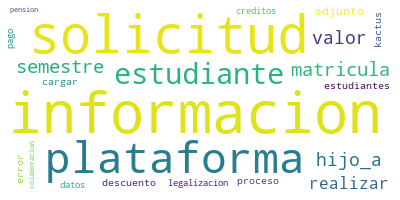

In [58]:
lista_mensajeuser=[]
for i in range(len(df_in)):
  lista_mensajeuser+=df_in[i]
long_string=''.join(lista_mensajeuser)
sal = pd.Series(long_string.split(' ')).value_counts()


sal2 = sal.reset_index()
sal2 = sal2.set_index('index')
saldic = sal2[0].to_dict()

#Creacion lista stop words
wordcloud = WordCloud(background_color="white",min_font_size=5, max_font_size=150, max_words=1000, contour_width=50, contour_color='steelblue', margin=15, 
                      stopwords=[])
#Crear el word cloud
#wordcloud.generate(long_string)
wordcloud.generate_from_frequencies(saldic)
# wordcloud.generate(saldic)
#Visualizar el word cloud
wordcloud.to_file('personal_patrones.png')
wordcloud.to_image()

In [59]:
segmento = str.upper("{}".format(name))
# Iniciar el count vectorizer con stop words personalizado en español
count_vectorizer = CountVectorizer(stop_words=[])
# Ajustar y transformar los términos procesados
count_data = count_vectorizer.fit_transform(df_in)
#Visualizar los términos mas comunes
x , y= plot_10_most_common_words(count_data, count_vectorizer)

In [60]:
pd.Series(df_in.map(lambda x : x.split(' ')).sum()).value_counts().head(15).index

Index(['solicitud', 'informacion', 'plataforma', 'estudiante', 'matricula',
       'semestre', 'adjunto', 'hijo_a', 'valor', 'realizar', 'proceso',
       'cargar', 'error', 'kactus', 'creditos'],
      dtype='object')

In [61]:
df_in.tolist()

['solicito activar agustiniano ciudad salitre cacs clave acceso modulo puedan ingresar alli datos educacion hijo_a s solicitud cacs cargar informacion aprobar respectivo respondieron clave activa entiendo solicitud activacion normalmente razones escasos recurso tramite realizo primera quincena empezar nada podido',
 'comunicacion dicen recibido informacion',
 'adjunto envio formato autorizacion habeas data actualizado fecha diligenciado firmado hijo_a beneficiaria convenio transferencias otra hecho proceso descrito autorizar informacion paso listado opciones aparece opcion autorizacion transferencias anterior agradeceria informen debemos realizar dicha autorizacion',
 'presente solicitud cambio informacion subida plataforma alumna encuentra matriculada grado kinder error costos deben registrar plataforma matricula pension codigo registro plataforma',
 'solicitud',
 'validar porceso aceptar informacion',
 'pensionado informa aprobo reconocimiento llego rechazo saber estado tramite',
 's

In [62]:
dw = list(sent_to_words(df_in))

In [63]:
dw

[['solicito',
  'activar',
  'agustiniano',
  'ciudad',
  'salitre',
  'cacs',
  'clave',
  'acceso',
  'modulo',
  'puedan',
  'ingresar',
  'alli',
  'datos',
  'educacion',
  'hijo_a',
  'solicitud',
  'cacs',
  'cargar',
  'informacion',
  'aprobar',
  'respectivo',
  'respondieron',
  'clave',
  'activa',
  'entiendo',
  'solicitud',
  'activacion',
  'normalmente',
  'razones',
  'escasos',
  'recurso',
  'tramite',
  'realizo',
  'primera',
  'quincena',
  'empezar',
  'nada',
  'podido'],
 ['comunicacion', 'dicen', 'recibido', 'informacion'],
 ['adjunto',
  'envio',
  'formato',
  'autorizacion',
  'habeas',
  'data',
  'actualizado',
  'fecha',
  'diligenciado',
  'firmado',
  'hijo_a',
  'beneficiaria',
  'convenio',
  'transferencias',
  'otra',
  'hecho',
  'proceso',
  'descrito',
  'autorizar',
  'informacion',
  'paso',
  'listado',
  'opciones',
  'aparece',
  'opcion',
  'autorizacion',
  'transferencias',
  'anterior',
  'agradeceria',
  'informen',
  'debemos',
  're

In [64]:
len(dw)

1121

In [65]:
# @title Creación del Corpus
%%time

nlp = spacy.load('es_core_news_md')

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in swseg] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(dw, min_count=5, threshold=100))
trigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(bigram[dw], threshold=100))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in lista_stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#Definicion de segmento a analizar

# data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
# texts = data_lemmatized

data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
id2word = corpora.Dictionary(data_words_bigrams)

# texts = data_lemmatized
texts = data_words_bigrams



corpus = [id2word.doc2bow(text) for text in texts]

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



CPU times: user 20.4 s, sys: 888 ms, total: 21.3 s
Wall time: 21.4 s


In [66]:
# #@title Optimización del Modelo
# #Definicion del segmento persistente
# segmento = "Solucion"

# #Funcion de soporte
# def compute_coherence_values(corpus, dictionary, k, a, b):
    
#     lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=10, 
#                                            random_state=100,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha=a,
#                                            eta=b,
#                                            per_word_topics=True)
    
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
#     return coherence_model_lda.get_coherence()

# grid = {}
# grid['Validation_Set'] = {}

# #Rango de topicos
# min_topics = 2
# # max_topics = 11
# max_topics = 5
# step_size = 1
# topics_range = range(min_topics, max_topics, step_size)

# #Parametro Alpha
# alpha = list(np.arange(0.01, 1, 0.3))
# alpha.append('symmetric')
# alpha.append('asymmetric')

# #Parametro Beta
# beta = list(np.arange(0.01, 1, 0.3))
# beta.append('symmetric')

# #Conjuntos de validacion
# num_of_docs = len(corpus)
# corpus_sets = [corpus]

# corpus_title = ['100% Corpus']

# model_results = {'Validation_Set': [],
#                  'Topics': [],
#                  'Alpha': [],
#                  'Beta': [],
#                  'Coherence': []
#                 }

# #Intensivo en tiempo (Promedio de tiempo: 2 Horas)

# if 1 == 1:
#     pbar = tqdm.tqdm(total=540)
    
#     for i in range(len(corpus_sets)):
#         for k in topics_range:
#             for a in alpha:
#                 for b in beta:
#                     cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
#                                                   k=k, a=a, b=b)

#                     model_results['Validation_Set'].append(corpus_title[i])
#                     model_results['Topics'].append(k)
#                     model_results['Alpha'].append(a)
#                     model_results['Beta'].append(b)
#                     model_results['Coherence'].append(cv)
                    
#                     pbar.update(1)
#     pd.DataFrame(model_results).to_csv(segmento+'.csv', index=False)
#     pbar.close()

# #Persistencia de hiperparámetros
# model_results_tabc = pd.DataFrame(model_results)
# model_results_tabc.to_csv(segmento + '_model.csv')
# print("**", len(model_results_tabc), segmento, "\n")
# model_results_tabc.head()

# #Mejor Modelo
# model_results_tabc = pd.read_csv(segmento + '_model.csv')
# best_model = model_results_tabc[model_results_tabc.Coherence == model_results_tabc.Coherence.max()][:1]
# #display(best_model.head())

# #Hiperparámetros del mejor modelo
# Topics = int(best_model.Topics.item())
# Alpha = float(best_model.Alpha.item())
# Beta = float(best_model.Beta.item())

# print("HIPERPARÁMETROS DEL MODELO OPTIMIZADO:")
# print('\nNumero de Tópicos:', Topics)
# print('Parámetro Alfa:', Alpha)
# print('Parámetro Beta:', Beta)
# #esto estaba silenciado

In [67]:
#@title Modelo LDA Optimizado 
%%time
# se cambio la vesion de pylavis https://stackoverflow.com/questions/66123774/why-pyldavis-graph-does-not-display-topic-keywords-on-the-bar-chart
# import pyLDAvis.gensim
# %matplotlib inline
#Visualización del modelo
pyLDAvis.enable_notebook()
# pyLDAvis.enable_notebook(local=True)

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.909999999999999,
                                           eta=0.61,                                        
                                           per_word_topics=True)

#Visualizacion de los tópicos generados en el modelo LDA
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

#Prerrequisitos minimos para la representacion grafica del modelado de topicos
d = id2word
c = corpus
lda = lda_model

#Parametros de visualizacion
data = pyLDAvis.gensim.prepare(lda, c, d)

#Persistencia de resultados de modelado de tópicos
pyLDAvis.save_html(data, 'vis_' +name + '.html')
print('\n\n')
#Visualizacion
display(data)


[(0,
  '0.042*"solicitud" + 0.021*"semestre" + 0.015*"hijo_a" + 0.014*"informacion" '
  '+ 0.013*"kactus" + 0.011*"plataforma" + 0.010*"envio" + 0.009*"respuesta" + '
  '0.009*"legalizacion" + 0.009*"aprobar"'),
 (1,
  '0.014*"valor" + 0.011*"descuento" + 0.011*"solicitud" + 0.011*"pago" + '
  '0.010*"pension" + 0.007*"hay" + 0.007*"anterior" + 0.007*"matricula" + '
  '0.005*"fecha" + 0.005*"acuerdo"'),
 (2,
  '0.049*"informacion" + 0.037*"estudiante" + 0.024*"plataforma" + '
  '0.022*"adjunto" + 0.021*"cargar" + 0.021*"matricula" + 0.017*"creditos" + '
  '0.016*"error" + 0.015*"proceso" + 0.014*"periodo"')]





PreparedData(topic_coordinates=              x        y  topics  cluster       Freq
topic                                               
0     -0.068301  0.13936       1        1  39.880711
1     -0.104440 -0.12119       2        1  30.066445
2      0.172741 -0.01817       3        1  30.052844, topic_info=             Term        Freq       Total Category  logprob  loglift
143    estudiante  269.000000  269.000000  Default  30.0000  30.0000
16    informacion  449.000000  449.000000  Default  29.0000  29.0000
38        adjunto  144.000000  144.000000  Default  28.0000  28.0000
8          cargar  140.000000  140.000000  Default  27.0000  27.0000
32      solicitud  451.000000  451.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
10          datos   50.483985   98.973196   Topic3  -4.8652   0.5290
141   amablemente   28.454101   38.624179   Topic3  -5.4386   0.8966
145        imagen   28.534856   40.355699   Topic3  -5.4357   0.8556
111  legalizacion   36.066412  116.818067   Topic3  -5.2015   0.0270
182          pago   33.740298  137.405421   Topic3  -5.2682  -0.2020

[203 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
705       1  0.223874         acuerdo
705       2  0.761172         acuerdo
705       3  0.022387         acuerdo
1268      1  0.962240  adicionalmente
1268      2  0.032075  adicionalmente
...     ...       ...             ...
185       2  0.523622           valor
185       3  0.473488           valor
287       1  0.029940         valores
287       2  0.928146         valores
287       3  0.029940         valores

[402 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

CPU times: user 4.24 s, sys: 161 ms, total: 4.4 s
Wall time: 6.58 s


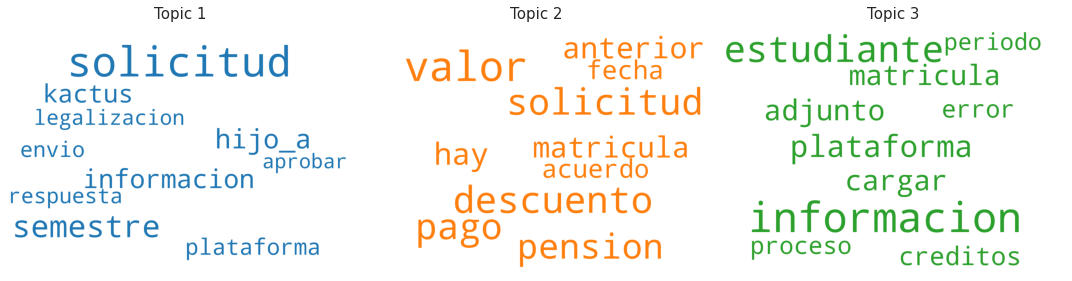

In [68]:
#@title Nubes de Palabras de los Términos clave N Principales en cada Tema
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=[],
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 3, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=15))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.savefig("personal_{}_topics_{}_results.png".format(name,i+1),bbox_inches = 'tight')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [69]:
#@title Red Semántica

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
#print(trigram_mod[bigram_mod[data_words[0]]])
# Funciones para bigrams, trigrams lemmatization
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#Aplicacion de las respectivas funciones
#Formacion de bigramas
data_words_bigrams = make_bigrams(data_words)

#Creacion del diccionario
id2word = corpora.Dictionary(data_words_bigrams)

# Creacion del Corpus
texts = data_words_bigrams

#Frecuencia termino documento
corpus = [id2word.doc2bow(text) for text in texts]

#VEMOS CUANTOS TERMINOS ESTAN EN NUESTRO DICCIONARIO Y CUALES SON LOS MÁS FRECUENTE
word_freq = defaultdict(int)
for sent in data_words_bigrams:
    for i in sent:
        word_freq[i] += 10
len(word_freq)

sorted(word_freq, key=word_freq.get, reverse=True)[50:100]

cores = multiprocessing.cpu_count()

##Entrenamiento del Modelo
w2v_model = Word2Vec(min_count=7, #SE CONSTRUYE EL VOCABULARIO A PARTIR DE LA FRECUENCIA DE APARICION QUE SE DEFINA AQUI
                     window=3,#SE AJUSTA EL NUMERO DE PALABRAS ATRAS Y ADELANTE DE LA PALABRA OBJETIVO PARA VECORIZARLA
                     size=30, #EL TAMANO DEL VECTOR DE CADA PALABRA
                     sample=1e-4, #-5 en principio #ESTE ES EL PARAMETRO QUE HAY QUE AJUSTAR, ES EL MAS SENSIBLE DEL MODELO
                     alpha=0.003, 
                     min_alpha=0.007, 
                     negative=10,
                     workers=cores-1)

#Construccion de vocabulario
w2v_model.build_vocab(data_words_bigrams, progress_per=10000)

#Entrenamiento del modelo
a=w2v_model.train(data_words_bigrams, total_examples=w2v_model.corpus_count, epochs=200, report_delay=1)

#Terminos similares
# w2v_model.wv.most_similar(positive=["contrasena"], topn=10)

##FUNCION PARA REDUCIR LA DIMENSION DEL ESPACIO DE PALABRAS Y PODER VISUALIZARLAS
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 30), dtype='f')
    word_labels = [word]
    color_list  = ["#25427B"] #a los colores de la campaña

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append("#33BBFF")
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append("#EBECED")
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    freq=[]
    for i in word_labels:
       freq.append(word_freq[i])

    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list,'freq':freq})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': df['freq'],
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ('+ df["words"][line].title()+','+str(df['freq'][line])+')',
                 horizontalalignment='left',
                 verticalalignment='top', size='small',
                 #color=df['color'][line],
                 color='black',
                 weight='normal'
                ).set_size(11)
    
    plt.axis(emit=True)
    plt.xlim(Y[:, 0].min()-10, Y[:, 0].max()+10)
    plt.ylim(Y[:, 1].min()-10, Y[:, 1].max()+30)
    plt.title('Visualización semántica para {}'.format(word.title()))

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



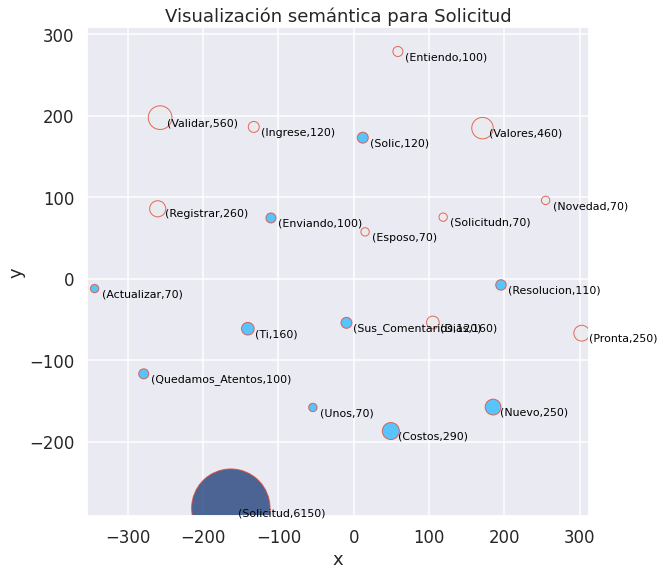

In [70]:
#@title
nombre = x[0]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')##

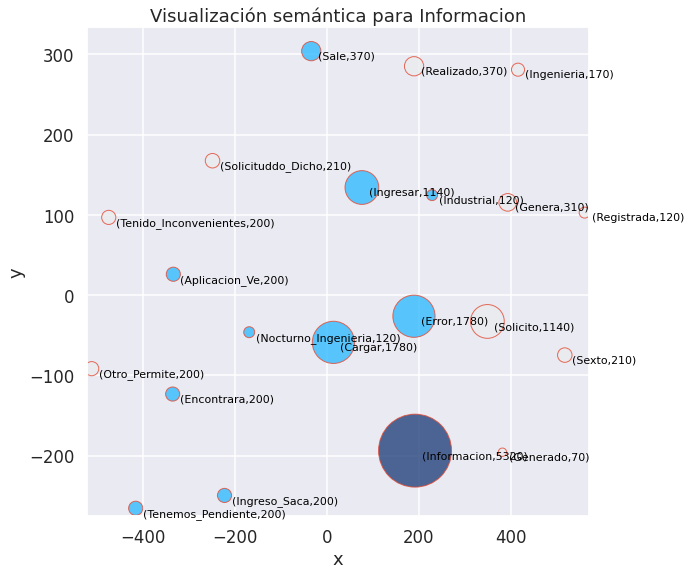

In [71]:
#@title


# tsnescatterplot(w2v_model, "activo", [t[0] for t in w2v_model.wv.most_similar(positive=["activo"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
#@title
nombre = x[1]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

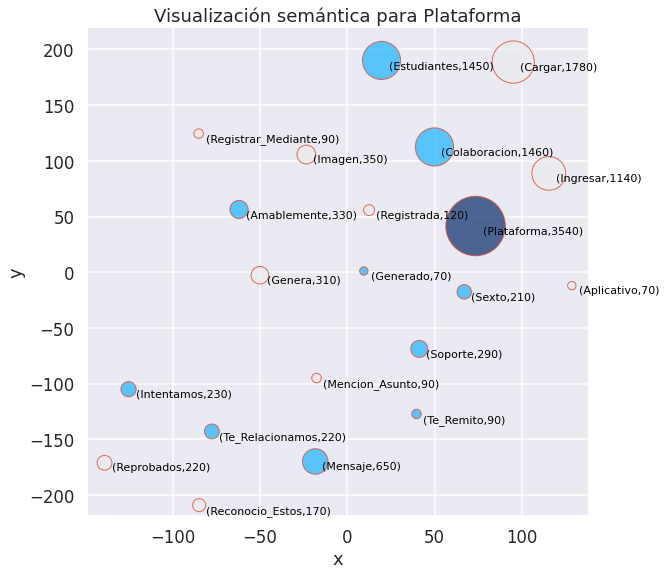

In [72]:
# @title 
#cuota se replaza por el temino clave que encontramos en las graficas de barras para 1-gramas
# tsnescatterplot(w2v_model, "confirmar", [t[0] for t in w2v_model.wv.most_similar(positive=["confirmar"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[2]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

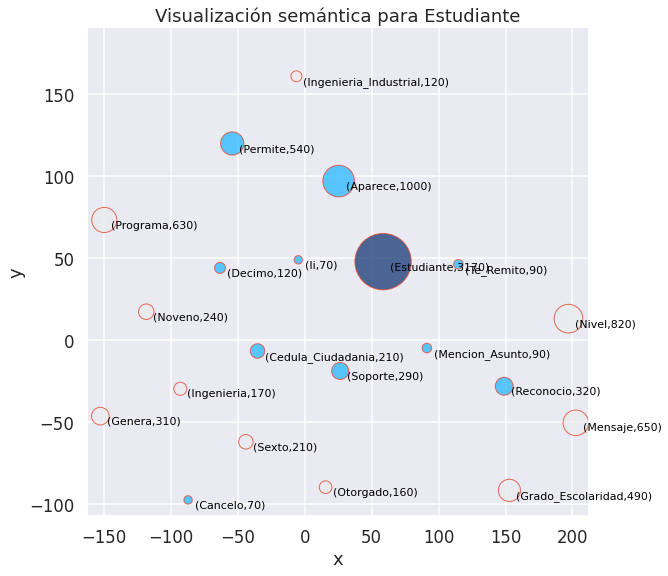

In [73]:
#@title
# tsnescatterplot(w2v_model, "actualizar", [t[0] for t in w2v_model.wv.most_similar(positive=["actualizar"], topn=20)][10:])
# plt.savefig("intereses_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
nombre = x[3]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

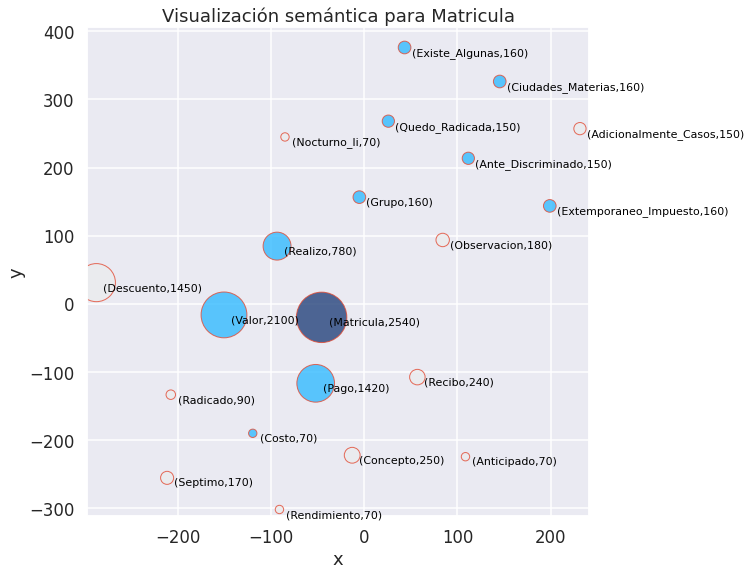

In [74]:
#@title
# tsnescatterplot(w2v_model, "codigo", [t[0] for t in w2v_model.wv.most_similar(positive=["codigo"], topn=20)][10:])
# plt.savefig("llegando_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[4]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

In [75]:
 word_vectors = w2v_model.wv
 word_vectors.save_word2vec_format('w2vecx_total_{}'.format(name))
 #Save model
from gensim.scripts.word2vec2tensor import word2vec2tensor 
word2vec2tensor('w2vecx_total_{}'.format(name), '{}_total_tensor00'.format(name))

In [76]:
#hacer version  con guines y sin guines que llos dijeron.

### Solucion

In [77]:
name = 'Solucion'

In [78]:
df_creacion =grupo['ObservacionCreacion'].copy()
df_solucion =grupo['ObservacionSolucion_+_n2'].copy()
df_in=df_solucion
df_in.iloc[0]

'confirmamos pago decimo secundaria beneficiaria cancelo junto primera quincena  solicito activar agustiniano ciudad salitre cacs clave acceso modulo puedan ingresar alli datos educacion hijo_a s solicitud cacs cargar informacion aprobar respectivo respondieron clave activa entiendo solicitud activacion normalmente razones escasos recurso tramite realizo primera quincena empezar nada podido'

In [79]:
  for i in range(1,35):
    ng = i
    segmento = str.upper("({}_{}-gramas)".format(name,ng))
    # Iniciar el count vectorizer con stop words personalizado en español
    count_vectorizer = CountVectorizer(stop_words=[],ngram_range=(ng, ng))
    # Ajustar y transformar los términos procesados
    count_data = count_vectorizer.fit_transform(df_in)
    #Visualizar los términos mas comunes
    words,counts = plot_10_most_common_words(count_data, count_vectorizer)
    # buen dia , ecompetro com , com .co 
    print(words)

['solicitud', 'informacion', 'plataforma', 'estudiante', 'semestre', 'matricula', 'valor', 'adjunto', 'proceso', 'realizar', 'cargue', 'error', 'acuerdo', 'respuesta', 'encuentra']


['acuerdo solicitud', 'cargue informacion', 'valor matricula', 'cargar informacion', 'matricula pension', 'primera quincena', 'plataforma kactus', 'confirmamos desembolso', 'grado escolaridad', 'informacion estudiante', 'escolaridad reconocio', 'solicitud adjunto', 'cancelara junto', 'descuento matricula', 'nivel grado']


['grado escolaridad reconocio', 'nivel grado escolaridad', 'adjunto datos descuento', 'datos descuento descuento', 'descuento descuento matricula', 'descuento matricula pension', 'escolaridad reconocio beneficio_educativo', 'matricula pension virtualidad', 'solicitud adjunto datos', 'agustiniano ciudad salitre', 'junto primera quincena', 'acuerdo aprobacion recibida', 'mensaje nivel grado', 'pension virtualidad reconocimiento', 'primera quincena marzo']


['nivel grado escolaridad reconocio', 'adjunto datos descuento descuento', 'datos descuento descuento matricula', 'descuento descuento matricula pension', 'descuento matricula pension virtualidad', 'solicitud adjunto datos descuento', 'grado escolaridad reconocio beneficio_educativo', 'mensaje nivel grado escolaridad', 'matricula pension virtualidad reconocimiento', 'pension virtualidad reconocimiento agustiniano', 'reconocimiento agustiniano ciudad salitre', 'virtualidad reconocimiento agustiniano ciudad', 'cargue plataforma mensaje nivel', 'estudiante intentamos realizar cargue', 'intentamos realizar cargue plataforma']


['adjunto datos descuento descuento matricula', 'datos descuento descuento matricula pension', 'descuento descuento matricula pension virtualidad', 'solicitud adjunto datos descuento descuento', 'nivel grado escolaridad reconocio beneficio_educativo', 'mensaje nivel grado escolaridad reconocio', 'descuento matricula pension virtualidad reconocimiento', 'matricula pension virtualidad reconocimiento agustiniano', 'pension virtualidad reconocimiento agustiniano ciudad', 'virtualidad reconocimiento agustiniano ciudad salitre', 'cargue plataforma mensaje nivel grado', 'estudiante intentamos realizar cargue plataforma', 'intentamos realizar cargue plataforma mensaje', 'plataforma mensaje nivel grado escolaridad', 'realizar cargue plataforma mensaje nivel']


['adjunto datos descuento descuento matricula pension', 'datos descuento descuento matricula pension virtualidad', 'solicitud adjunto datos descuento descuento matricula', 'mensaje nivel grado escolaridad reconocio beneficio_educativo', 'descuento descuento matricula pension virtualidad reconocimiento', 'descuento matricula pension virtualidad reconocimiento agustiniano', 'matricula pension virtualidad reconocimiento agustiniano ciudad', 'pension virtualidad reconocimiento agustiniano ciudad salitre', 'cargue plataforma mensaje nivel grado escolaridad', 'estudiante intentamos realizar cargue plataforma mensaje', 'intentamos realizar cargue plataforma mensaje nivel', 'plataforma mensaje nivel grado escolaridad reconocio', 'realizar cargue plataforma mensaje nivel grado', 'relacionamos estudiante intentamos realizar cargue plataforma', 'te relacionamos estudiante intentamos realizar cargue']


['adjunto datos descuento descuento matricula pension virtualidad', 'solicitud adjunto datos descuento descuento matricula pension', 'datos descuento descuento matricula pension virtualidad reconocimiento', 'descuento descuento matricula pension virtualidad reconocimiento agustiniano', 'descuento matricula pension virtualidad reconocimiento agustiniano ciudad', 'matricula pension virtualidad reconocimiento agustiniano ciudad salitre', 'cargue plataforma mensaje nivel grado escolaridad reconocio', 'estudiante intentamos realizar cargue plataforma mensaje nivel', 'intentamos realizar cargue plataforma mensaje nivel grado', 'plataforma mensaje nivel grado escolaridad reconocio beneficio_educativo', 'realizar cargue plataforma mensaje nivel grado escolaridad', 'relacionamos estudiante intentamos realizar cargue plataforma mensaje', 'te relacionamos estudiante intentamos realizar cargue plataforma', 'adjunto novedades hijos empleados vinculados cuales aparecen', 'aplicacion ve adjunto otro 

['solicitud adjunto datos descuento descuento matricula pension virtualidad', 'adjunto datos descuento descuento matricula pension virtualidad reconocimiento', 'datos descuento descuento matricula pension virtualidad reconocimiento agustiniano', 'descuento descuento matricula pension virtualidad reconocimiento agustiniano ciudad', 'descuento matricula pension virtualidad reconocimiento agustiniano ciudad salitre', 'cargue plataforma mensaje nivel grado escolaridad reconocio beneficio_educativo', 'estudiante intentamos realizar cargue plataforma mensaje nivel grado', 'intentamos realizar cargue plataforma mensaje nivel grado escolaridad', 'realizar cargue plataforma mensaje nivel grado escolaridad reconocio', 'relacionamos estudiante intentamos realizar cargue plataforma mensaje nivel', 'te relacionamos estudiante intentamos realizar cargue plataforma mensaje', 'adjunto novedades hijos empleados vinculados cuales aparecen aprobados', 'cargar informacion periodo estudiantes solicituddo d

['solicitud adjunto datos descuento descuento matricula pension virtualidad reconocimiento', 'adjunto datos descuento descuento matricula pension virtualidad reconocimiento agustiniano', 'datos descuento descuento matricula pension virtualidad reconocimiento agustiniano ciudad', 'descuento descuento matricula pension virtualidad reconocimiento agustiniano ciudad salitre', 'estudiante intentamos realizar cargue plataforma mensaje nivel grado escolaridad', 'intentamos realizar cargue plataforma mensaje nivel grado escolaridad reconocio', 'realizar cargue plataforma mensaje nivel grado escolaridad reconocio beneficio_educativo', 'relacionamos estudiante intentamos realizar cargue plataforma mensaje nivel grado', 'te relacionamos estudiante intentamos realizar cargue plataforma mensaje nivel', 'adjunto novedades hijos empleados vinculados cuales aparecen aprobados sistema', 'cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes', 'cargar informacion sale er

['adjunto datos descuento descuento matricula pension virtualidad reconocimiento agustiniano ciudad', 'datos descuento descuento matricula pension virtualidad reconocimiento agustiniano ciudad salitre', 'solicitud adjunto datos descuento descuento matricula pension virtualidad reconocimiento agustiniano', 'estudiante intentamos realizar cargue plataforma mensaje nivel grado escolaridad reconocio', 'intentamos realizar cargue plataforma mensaje nivel grado escolaridad reconocio beneficio_educativo', 'relacionamos estudiante intentamos realizar cargue plataforma mensaje nivel grado escolaridad', 'te relacionamos estudiante intentamos realizar cargue plataforma mensaje nivel grado', 'cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar', 'cargar informacion sale error aplicacion ve adjunto otro permite ingreso', 'colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo', 'dicho proceso tenido inconvenien

['adjunto datos descuento descuento matricula pension virtualidad reconocimiento agustiniano ciudad salitre', 'solicitud adjunto datos descuento descuento matricula pension virtualidad reconocimiento agustiniano ciudad', 'estudiante intentamos realizar cargue plataforma mensaje nivel grado escolaridad reconocio beneficio_educativo', 'relacionamos estudiante intentamos realizar cargue plataforma mensaje nivel grado escolaridad reconocio', 'te relacionamos estudiante intentamos realizar cargue plataforma mensaje nivel grado escolaridad', 'cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion', 'cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca', 'colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho', 'dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto', 'estudiantes solicituddo dicho proceso tenido inconvenientes carga

['solicitud adjunto datos descuento descuento matricula pension virtualidad reconocimiento agustiniano ciudad salitre', 'relacionamos estudiante intentamos realizar cargue plataforma mensaje nivel grado escolaridad reconocio beneficio_educativo', 'te relacionamos estudiante intentamos realizar cargue plataforma mensaje nivel grado escolaridad reconocio', 'cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale', 'colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso', 'dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro', 'estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve', 'inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca', 'informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error'

['te relacionamos estudiante intentamos realizar cargue plataforma mensaje nivel grado escolaridad reconocio beneficio_educativo', 'cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error', 'colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido', 'dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite', 'estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto', 'informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion', 'ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion', 'periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve', 'plataforma cargar informacion perio

['cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion', 'colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes', 'dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso', 'estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro', 'informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve', 'ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale', 'periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto', 'plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar infor

['cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve', 'colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar', 'dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca', 'estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite', 'informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto', 'ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error', 'periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro', 'plataforma cargar informacion periodo estudiantes solicituddo dicho 

['cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto', 'colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion', 'estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso', 'informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro', 'ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion', 'periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite', 'plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplic

['cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro', 'colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale', 'estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca', 'informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite', 'ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve', 'periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso', 'plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes c

['cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite', 'colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error', 'informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso', 'ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto', 'periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca', 'plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro', 'proceso ingresar plataforma cargar informacion 

['cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso', 'colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion', 'informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca', 'ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro', 'plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite', 'proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve 

['cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca', 'colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve', 'ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite', 'plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso', 'proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro', 'realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenien

['colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto', 'ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso', 'plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca', 'proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite', 'realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro', 'solicito colaboracion realizado proceso ingresar plataforma cargar informac

['colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro', 'ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca', 'proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso', 'realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite', 'solicito colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto', 'cargar informacion periodo

['colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite', 'proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca', 'realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso', 'solicito colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro', 'cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontr

['colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso', 'realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca', 'solicito colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite', 'cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion', 'dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion est

['colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca', 'solicito colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso', 'cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion estudiantes', 'estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion estudiantes tenemos pendiente cargar', 'informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion

['solicito colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca', 'cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion estudiantes tenemos', 'colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema', 'estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion estudiantes tenemos pendiente cargar informacion', 'informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar 

['cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion estudiantes tenemos pendiente', 'colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto', 'informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion estudiantes tenemos pendiente cargar', 'ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion estudiantes', 'periodo estudiantes solicituddo dicho proceso teni

['cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion estudiantes tenemos pendiente cargar', 'colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara', 'informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion estudiantes tenemos pendiente cargar informacion', 'ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion estudiantes tenemos', 'plataforma c

['cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion estudiantes tenemos pendiente cargar informacion', 'colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion', 'ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion estudiantes tenemos pendiente', 'plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion estudiantes 

['colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion estudiantes', 'ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion estudiantes tenemos pendiente cargar', 'plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion estudiantes tenemos pendiente cargar informacion', 'proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sist

['colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion estudiantes tenemos', 'ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion estudiantes tenemos pendiente cargar informacion', 'proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion estudiantes tenemos pendiente cargar', 'realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adj

['colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion estudiantes tenemos pendiente', 'proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion estudiantes tenemos pendiente cargar informacion', 'realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion estudiantes tenemos pendiente cargar', 'solicito colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenient

['colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion estudiantes tenemos pendiente cargar', 'realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion estudiantes tenemos pendiente cargar informacion', 'solicito colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion estudiantes tenemos pendiente', 'alborada pandemia estamos atravesando realizo descuento valor pension puntual rubro pension era paso tu valiosa 

['colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion estudiantes tenemos pendiente cargar informacion', 'solicito colaboracion realizado proceso ingresar plataforma cargar informacion periodo estudiantes solicituddo dicho proceso tenido inconvenientes cargar informacion sale error aplicacion ve adjunto otro permite ingreso saca sistema adjunto encontrara informacion estudiantes tenemos pendiente cargar', 'alborada pandemia estamos atravesando realizo descuento valor pension puntual rubro pension era paso tu valiosa colaboracion confirmandonos todos estudiantes inscritos plataforma presento dicho descuento posible conocer nuevo rubro pension valor reporta herramienta reconocido todo', 'atravesando realizo descuento valor pension puntual rubro pension era paso tu valiosa colaboracion con

In [80]:
df_in.reset_index(inplace=True, drop=True)

In [81]:
df_in=df_in.apply(lambda x: x.strip())

In [82]:
df_in.head(3)

0    confirmamos pago decimo secundaria beneficiari...
1    confirmamos desembolso beneficiario octavo sec...
2    confirmamos desembolso beneficiaria cancelara ...
Name: ObservacionSolucion_+_n2, dtype: object

In [83]:
df_in[2]

'confirmamos desembolso beneficiaria cancelara junto mesada marzo preciso resaltar formato habeas data diligenciar mientras dure convenio entrar estudiante adjunto envio formato autorizacion habeas data actualizado fecha diligenciado firmado hijo_a beneficiaria convenio transferencias otra hecho proceso descrito autorizar informacion paso listado opciones aparece opcion autorizacion transferencias anterior agradeceria informen debemos realizar dicha autorizacion'

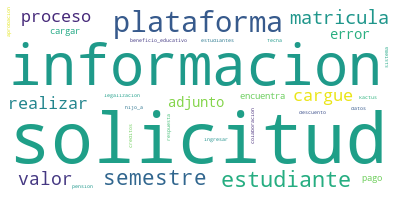

In [84]:
lista_mensajeuser=[]
for i in range(len(df_in)):
  lista_mensajeuser+=df_in[i]
long_string=''.join(lista_mensajeuser)
sal = pd.Series(long_string.split(' ')).value_counts()


sal2 = sal.reset_index()
sal2 = sal2.set_index('index')
saldic = sal2[0].to_dict()

#Creacion lista stop words
wordcloud = WordCloud(background_color="white",min_font_size=5, max_font_size=150, max_words=1000, contour_width=50, contour_color='steelblue', margin=15, 
                      stopwords=[])
#Crear el word cloud
#wordcloud.generate(long_string)
wordcloud.generate_from_frequencies(saldic)
# wordcloud.generate(saldic)
#Visualizar el word cloud
wordcloud.to_file('personal_patrones.png')
wordcloud.to_image()

In [85]:
segmento = str.upper("{}".format(name))
# Iniciar el count vectorizer con stop words personalizado en español
count_vectorizer = CountVectorizer(stop_words=[])
# Ajustar y transformar los términos procesados
count_data = count_vectorizer.fit_transform(df_in)
#Visualizar los términos mas comunes
x , y= plot_10_most_common_words(count_data, count_vectorizer)

In [86]:
pd.Series(df_in.map(lambda x : x.split(' ')).sum()).value_counts().head(15).index

Index(['solicitud', 'informacion', 'plataforma', 'estudiante', 'semestre',
       'matricula', 'valor', 'adjunto', 'proceso', 'realizar', 'cargue',
       'error', 'acuerdo', 'respuesta', 'encuentra'],
      dtype='object')

In [87]:
df_in.tolist()

['confirmamos pago decimo secundaria beneficiaria cancelo junto primera quincena  solicito activar agustiniano ciudad salitre cacs clave acceso modulo puedan ingresar alli datos educacion hijo_a s solicitud cacs cargar informacion aprobar respectivo respondieron clave activa entiendo solicitud activacion normalmente razones escasos recurso tramite realizo primera quincena empezar nada podido',
 'confirmamos desembolso beneficiario octavo secundaria cancelara junto segunda quincena  comunicacion dicen recibido informacion',
 'confirmamos desembolso beneficiaria cancelara junto mesada marzo preciso resaltar formato habeas data diligenciar mientras dure convenio entrar estudiante adjunto envio formato autorizacion habeas data actualizado fecha diligenciado firmado hijo_a beneficiaria convenio transferencias otra hecho proceso descrito autorizar informacion paso listado opciones aparece opcion autorizacion transferencias anterior agradeceria informen debemos realizar dicha autorizacion',
 

In [88]:
dw = list(sent_to_words(df_in))

In [89]:
dw

[['confirmamos',
  'pago',
  'decimo',
  'secundaria',
  'beneficiaria',
  'cancelo',
  'junto',
  'primera',
  'quincena',
  'solicito',
  'activar',
  'agustiniano',
  'ciudad',
  'salitre',
  'cacs',
  'clave',
  'acceso',
  'modulo',
  'puedan',
  'ingresar',
  'alli',
  'datos',
  'educacion',
  'hijo_a',
  'solicitud',
  'cacs',
  'cargar',
  'informacion',
  'aprobar',
  'respectivo',
  'respondieron',
  'clave',
  'activa',
  'entiendo',
  'solicitud',
  'activacion',
  'normalmente',
  'razones',
  'escasos',
  'recurso',
  'tramite',
  'realizo',
  'primera',
  'quincena',
  'empezar',
  'nada',
  'podido'],
 ['confirmamos',
  'desembolso',
  'beneficiario',
  'octavo',
  'secundaria',
  'cancelara',
  'junto',
  'segunda',
  'quincena',
  'comunicacion',
  'dicen',
  'recibido',
  'informacion'],
 ['confirmamos',
  'desembolso',
  'beneficiaria',
  'cancelara',
  'junto',
  'mesada',
  'marzo',
  'preciso',
  'resaltar',
  'formato',
  'habeas',
  'data',
  'diligenciar',
  

In [90]:
len(dw)

1121

In [91]:
# @title Creación del Corpus
%%time

nlp = spacy.load('es_core_news_md')

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in swseg] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(dw, min_count=5, threshold=100))
trigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(bigram[dw], threshold=100))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in lista_stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#Definicion de segmento a analizar

# data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
# texts = data_lemmatized

data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
id2word = corpora.Dictionary(data_words_bigrams)

# texts = data_lemmatized
texts = data_words_bigrams



corpus = [id2word.doc2bow(text) for text in texts]

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



CPU times: user 21.1 s, sys: 1.17 s, total: 22.3 s
Wall time: 22.3 s


In [92]:
# #@title Optimización del Modelo
# #Definicion del segmento persistente
# segmento = "Solucion"

# #Funcion de soporte
# def compute_coherence_values(corpus, dictionary, k, a, b):
    
#     lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=10, 
#                                            random_state=100,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha=a,
#                                            eta=b,
#                                            per_word_topics=True)
    
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
#     return coherence_model_lda.get_coherence()

# grid = {}
# grid['Validation_Set'] = {}

# #Rango de topicos
# min_topics = 2
# # max_topics = 11
# max_topics = 5
# step_size = 1
# topics_range = range(min_topics, max_topics, step_size)

# #Parametro Alpha
# alpha = list(np.arange(0.01, 1, 0.3))
# alpha.append('symmetric')
# alpha.append('asymmetric')

# #Parametro Beta
# beta = list(np.arange(0.01, 1, 0.3))
# beta.append('symmetric')

# #Conjuntos de validacion
# num_of_docs = len(corpus)
# corpus_sets = [corpus]

# corpus_title = ['100% Corpus']

# model_results = {'Validation_Set': [],
#                  'Topics': [],
#                  'Alpha': [],
#                  'Beta': [],
#                  'Coherence': []
#                 }

# #Intensivo en tiempo (Promedio de tiempo: 2 Horas)

# if 1 == 1:
#     pbar = tqdm.tqdm(total=540)
    
#     for i in range(len(corpus_sets)):
#         for k in topics_range:
#             for a in alpha:
#                 for b in beta:
#                     cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
#                                                   k=k, a=a, b=b)

#                     model_results['Validation_Set'].append(corpus_title[i])
#                     model_results['Topics'].append(k)
#                     model_results['Alpha'].append(a)
#                     model_results['Beta'].append(b)
#                     model_results['Coherence'].append(cv)
                    
#                     pbar.update(1)
#     pd.DataFrame(model_results).to_csv(segmento+'.csv', index=False)
#     pbar.close()

# #Persistencia de hiperparámetros
# model_results_tabc = pd.DataFrame(model_results)
# model_results_tabc.to_csv(segmento + '_model.csv')
# print("**", len(model_results_tabc), segmento, "\n")
# model_results_tabc.head()

# #Mejor Modelo
# model_results_tabc = pd.read_csv(segmento + '_model.csv')
# best_model = model_results_tabc[model_results_tabc.Coherence == model_results_tabc.Coherence.max()][:1]
# #display(best_model.head())

# #Hiperparámetros del mejor modelo
# Topics = int(best_model.Topics.item())
# Alpha = float(best_model.Alpha.item())
# Beta = float(best_model.Beta.item())

# print("HIPERPARÁMETROS DEL MODELO OPTIMIZADO:")
# print('\nNumero de Tópicos:', Topics)
# print('Parámetro Alfa:', Alpha)
# print('Parámetro Beta:', Beta)
# #esto estaba silenciado

In [93]:
#@title Modelo LDA Optimizado 
%%time
# se cambio la vesion de pylavis https://stackoverflow.com/questions/66123774/why-pyldavis-graph-does-not-display-topic-keywords-on-the-bar-chart
# import pyLDAvis.gensim
# %matplotlib inline
#Visualización del modelo
pyLDAvis.enable_notebook()
# pyLDAvis.enable_notebook(local=True)

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.909999999999999,
                                           eta=0.61,                                        
                                           per_word_topics=True)

#Visualizacion de los tópicos generados en el modelo LDA
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

#Prerrequisitos minimos para la representacion grafica del modelado de topicos
d = id2word
c = corpus
lda = lda_model

#Parametros de visualizacion
data = pyLDAvis.gensim.prepare(lda, c, d)

#Persistencia de resultados de modelado de tópicos
pyLDAvis.save_html(data, 'vis_' +name + '.html')
print('\n\n')
#Visualizacion
display(data)


[(0,
  '0.025*"estudiante" + 0.020*"semestre" + 0.015*"matricula" + '
  '0.014*"creditos" + 0.014*"plataforma" + 0.013*"valor" + 0.009*"periodo" + '
  '0.008*"hijo_a" + 0.008*"realizar" + 0.007*"registro"'),
 (1,
  '0.041*"solicitud" + 0.028*"informacion" + 0.014*"acuerdo" + '
  '0.013*"encuentra" + 0.011*"respuesta" + 0.009*"aprobacion" + '
  '0.009*"atencion" + 0.009*"cargue" + 0.008*"beneficiario" + 0.008*"medio"'),
 (2,
  '0.033*"informacion" + 0.021*"proceso" + 0.020*"adjunto" + 0.020*"error" + '
  '0.020*"cargar" + 0.017*"plataforma" + 0.014*"informa" + '
  '0.014*"colaboracion" + 0.013*"estudiantes" + 0.013*"datos"')]





PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.133904  0.086662       1        1  40.814657
0      0.015391 -0.149027       2        1  35.785346
2     -0.149295  0.062365       3        1  23.399998, topic_info=            Term        Freq       Total Category  logprob  loglift
10        cargar  122.000000  122.000000  Default  30.0000  30.0000
65    estudiante  287.000000  287.000000  Default  29.0000  29.0000
20   informacion  542.000000  542.000000  Default  28.0000  28.0000
91         error  142.000000  142.000000  Default  27.0000  27.0000
49       adjunto  148.000000  148.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
140       kactus   37.245712  130.902656   Topic3  -5.1128   0.1955
65    estudiante   45.601707  287.477708   Topic3  -4.9104  -0.3888
37      solicito   29.967023   75.296828   Topic3  -5.3303   0.5311
388  herramienta   27.644762   60.797720   Topic3  -5.4109   0.6643
82      realizar   27.839281  151.101896   Topic3  -5.4039  -0.2391

[209 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
631       1  0.020446  academico
631       2  0.981394  academico
631       3  0.020446  academico
299       1  0.987194    acuerdo
299       2  0.006495    acuerdo
...     ...       ...        ...
269       2  0.019205    validar
269       3  0.038410    validar
197       1  0.004976      valor
197       2  0.607043      valor
197       3  0.393086      valor

[415 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

CPU times: user 4.49 s, sys: 113 ms, total: 4.6 s
Wall time: 5.16 s


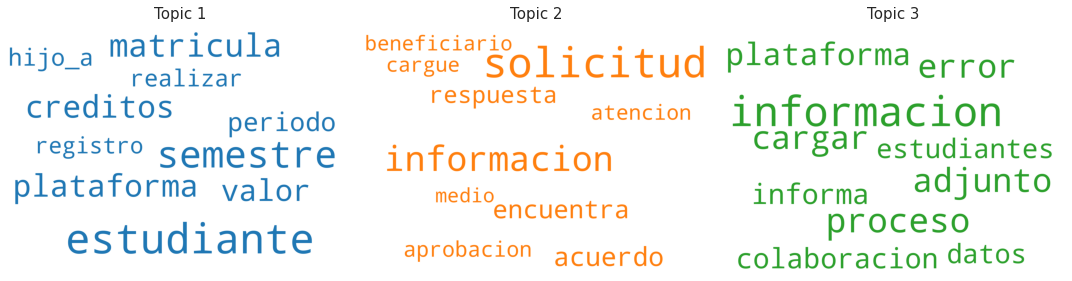

In [94]:
#@title Nubes de Palabras de los Términos clave N Principales en cada Tema
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=[],
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 3, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=15))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.savefig("personal_{}_topics_{}_results.png".format(name,i+1),bbox_inches = 'tight')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [95]:
#@title Red Semántica

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
#print(trigram_mod[bigram_mod[data_words[0]]])
# Funciones para bigrams, trigrams lemmatization
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#Aplicacion de las respectivas funciones
#Formacion de bigramas
data_words_bigrams = make_bigrams(data_words)

#Creacion del diccionario
id2word = corpora.Dictionary(data_words_bigrams)

# Creacion del Corpus
texts = data_words_bigrams

#Frecuencia termino documento
corpus = [id2word.doc2bow(text) for text in texts]

#VEMOS CUANTOS TERMINOS ESTAN EN NUESTRO DICCIONARIO Y CUALES SON LOS MÁS FRECUENTE
word_freq = defaultdict(int)
for sent in data_words_bigrams:
    for i in sent:
        word_freq[i] += 10
len(word_freq)

sorted(word_freq, key=word_freq.get, reverse=True)[50:100]

cores = multiprocessing.cpu_count()

##Entrenamiento del Modelo
w2v_model = Word2Vec(min_count=7, #SE CONSTRUYE EL VOCABULARIO A PARTIR DE LA FRECUENCIA DE APARICION QUE SE DEFINA AQUI
                     window=3,#SE AJUSTA EL NUMERO DE PALABRAS ATRAS Y ADELANTE DE LA PALABRA OBJETIVO PARA VECORIZARLA
                     size=30, #EL TAMANO DEL VECTOR DE CADA PALABRA
                     sample=1e-4, #-5 en principio #ESTE ES EL PARAMETRO QUE HAY QUE AJUSTAR, ES EL MAS SENSIBLE DEL MODELO
                     alpha=0.003, 
                     min_alpha=0.007, 
                     negative=10,
                     workers=cores-1)

#Construccion de vocabulario
w2v_model.build_vocab(data_words_bigrams, progress_per=10000)

#Entrenamiento del modelo
a=w2v_model.train(data_words_bigrams, total_examples=w2v_model.corpus_count, epochs=200, report_delay=1)

#Terminos similares
# w2v_model.wv.most_similar(positive=["contrasena"], topn=10)

##FUNCION PARA REDUCIR LA DIMENSION DEL ESPACIO DE PALABRAS Y PODER VISUALIZARLAS
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 30), dtype='f')
    word_labels = [word]
    color_list  = ["#25427B"] #a los colores de la campaña

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append("#33BBFF")
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append("#EBECED")
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    freq=[]
    for i in word_labels:
       freq.append(word_freq[i])

    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list,'freq':freq})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': df['freq'],
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ('+ df["words"][line].title()+','+str(df['freq'][line])+')',
                 horizontalalignment='left',
                 verticalalignment='top', size='small',
                 #color=df['color'][line],
                 color='black',
                 weight='normal'
                ).set_size(11)
    
    plt.axis(emit=True)
    plt.xlim(Y[:, 0].min()-10, Y[:, 0].max()+10)
    plt.ylim(Y[:, 1].min()-10, Y[:, 1].max()+30)
    plt.title('Visualización semántica para {}'.format(word.title()))

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



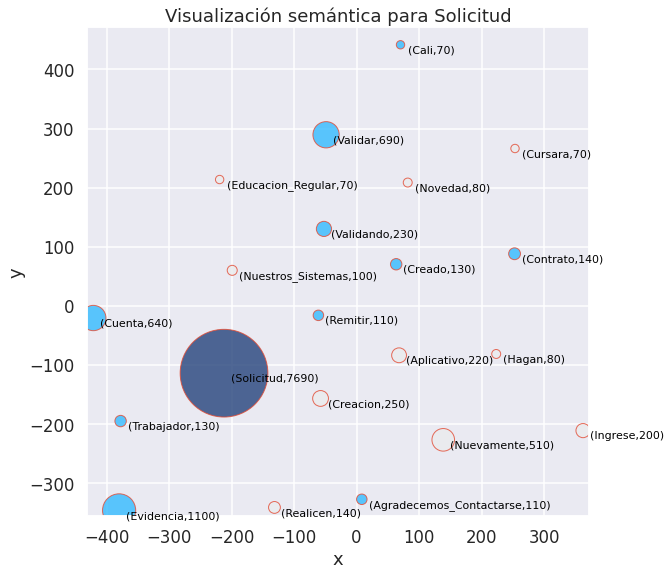

In [96]:
#@title
nombre = x[0]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')##

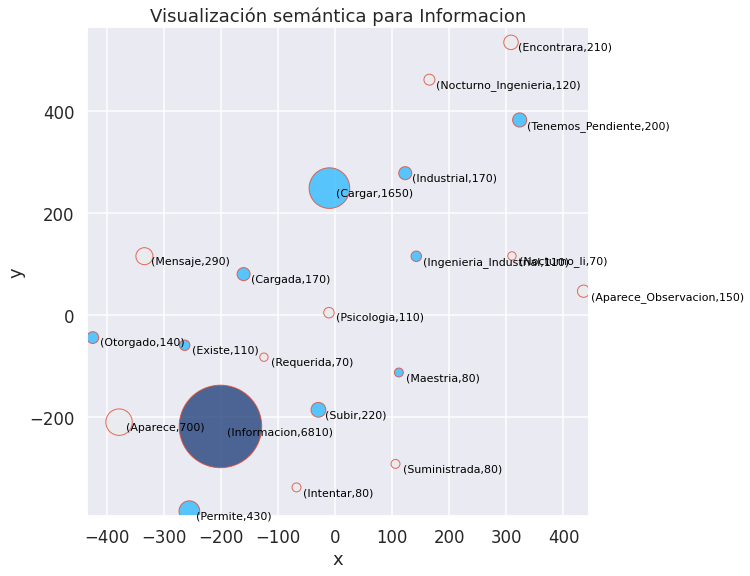

In [97]:
#@title


# tsnescatterplot(w2v_model, "activo", [t[0] for t in w2v_model.wv.most_similar(positive=["activo"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
#@title
nombre = x[1]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

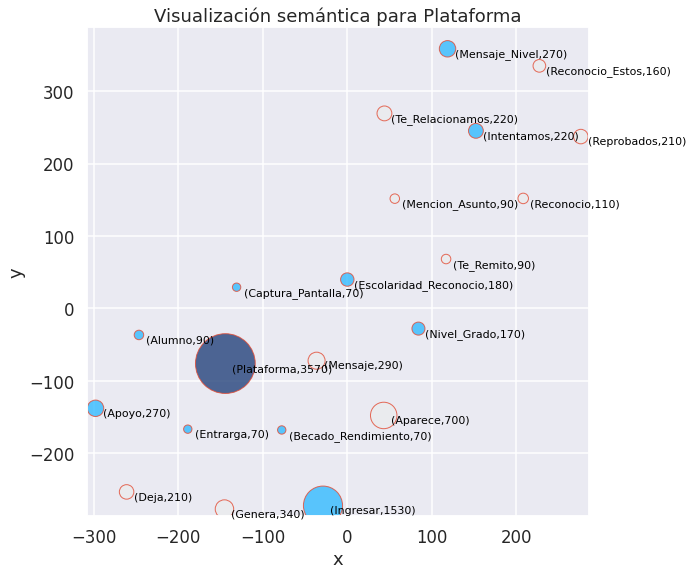

In [98]:
# @title 
#cuota se replaza por el temino clave que encontramos en las graficas de barras para 1-gramas
# tsnescatterplot(w2v_model, "confirmar", [t[0] for t in w2v_model.wv.most_similar(positive=["confirmar"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[2]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

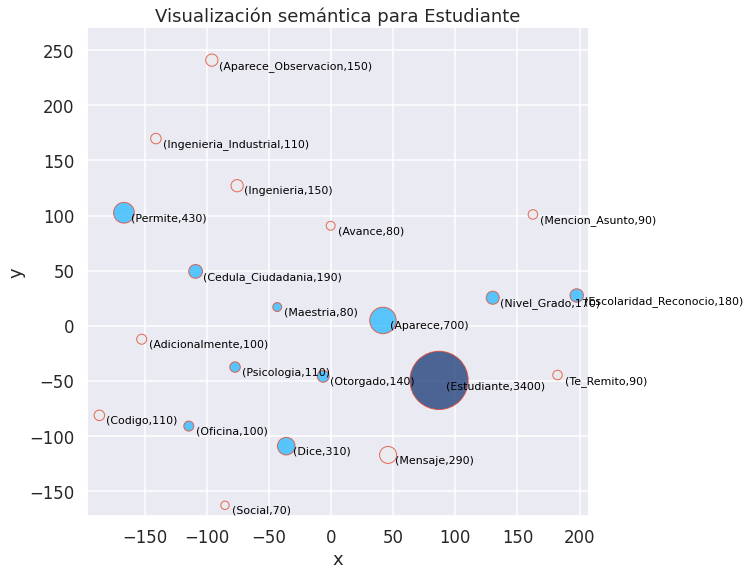

In [99]:
#@title
# tsnescatterplot(w2v_model, "actualizar", [t[0] for t in w2v_model.wv.most_similar(positive=["actualizar"], topn=20)][10:])
# plt.savefig("intereses_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
nombre = x[3]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

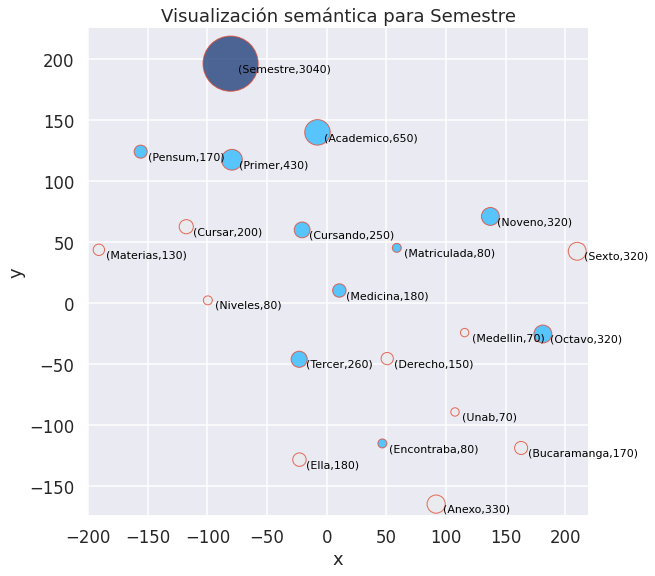

In [100]:
#@title
# tsnescatterplot(w2v_model, "codigo", [t[0] for t in w2v_model.wv.most_similar(positive=["codigo"], topn=20)][10:])
# plt.savefig("llegando_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[4]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

In [101]:
 word_vectors = w2v_model.wv
 word_vectors.save_word2vec_format('w2vecx_total_{}'.format(name))
 #Save model
from gensim.scripts.word2vec2tensor import word2vec2tensor 
word2vec2tensor('w2vecx_total_{}'.format(name), '{}_total_tensor00'.format(name))

In [102]:
#hacer version  con guines y sin guines que llos dijeron.

### Total

In [103]:
name = 'Total'

In [104]:
df_creacion =grupo['ObservacionCreacion'].copy()
df_solucion =grupo['ObservacionSolucion_+_n2'].copy()
df_in=df_creacion+ ' '+ df_solucion
df_in.iloc[0]

'solicito activar agustiniano ciudad salitre cacs clave acceso modulo puedan ingresar alli datos educacion hijo_a s solicitud cacs cargar informacion aprobar respectivo respondieron clave activa entiendo solicitud activacion normalmente razones escasos recurso tramite realizo primera quincena empezar nada podido confirmamos pago decimo secundaria beneficiaria cancelo junto primera quincena  solicito activar agustiniano ciudad salitre cacs clave acceso modulo puedan ingresar alli datos educacion hijo_a s solicitud cacs cargar informacion aprobar respectivo respondieron clave activa entiendo solicitud activacion normalmente razones escasos recurso tramite realizo primera quincena empezar nada podido'

In [105]:
  for i in range(1,6):
    ng = i
    segmento = str.upper("({}_{}-gramas)".format(name,ng))
    # Iniciar el count vectorizer con stop words personalizado en español
    count_vectorizer = CountVectorizer(stop_words=[],ngram_range=(ng, ng))
    # Ajustar y transformar los términos procesados
    count_data = count_vectorizer.fit_transform(df_in)
    #Visualizar los términos mas comunes
    words,counts = plot_10_most_common_words(count_data, count_vectorizer)
    # buen dia , ecompetro com , com .co 
    print(words)

['solicitud', 'informacion', 'plataforma', 'estudiante', 'semestre', 'matricula', 'adjunto', 'valor', 'realizar', 'proceso', 'error', 'hijo_a', 'cargar', 'kactus', 'cargue']


['cargar informacion', 'valor matricula', 'matricula pension', 'cargue informacion', 'plataforma kactus', 'acuerdo solicitud', 'grado escolaridad', 'escolaridad reconocio', 'nivel grado', 'informacion estudiante', 'solicitud adjunto', 'reconocio beneficio_educativo', 'descuento matricula', 'adjunto datos', 'datos descuento']


['grado escolaridad reconocio', 'nivel grado escolaridad', 'escolaridad reconocio beneficio_educativo', 'adjunto datos descuento', 'datos descuento descuento', 'descuento descuento matricula', 'descuento matricula pension', 'matricula pension virtualidad', 'solicitud adjunto datos', 'agustiniano ciudad salitre', 'mensaje nivel grado', 'pension virtualidad reconocimiento', 'reconocimiento agustiniano ciudad', 'virtualidad reconocimiento agustiniano', 'cargue plataforma mensaje']


['nivel grado escolaridad reconocio', 'grado escolaridad reconocio beneficio_educativo', 'adjunto datos descuento descuento', 'datos descuento descuento matricula', 'descuento descuento matricula pension', 'descuento matricula pension virtualidad', 'solicitud adjunto datos descuento', 'mensaje nivel grado escolaridad', 'matricula pension virtualidad reconocimiento', 'pension virtualidad reconocimiento agustiniano', 'reconocimiento agustiniano ciudad salitre', 'virtualidad reconocimiento agustiniano ciudad', 'cargue plataforma mensaje nivel', 'estudiante intentamos realizar cargue', 'intentamos realizar cargue plataforma']


['nivel grado escolaridad reconocio beneficio_educativo', 'adjunto datos descuento descuento matricula', 'datos descuento descuento matricula pension', 'descuento descuento matricula pension virtualidad', 'solicitud adjunto datos descuento descuento', 'mensaje nivel grado escolaridad reconocio', 'descuento matricula pension virtualidad reconocimiento', 'matricula pension virtualidad reconocimiento agustiniano', 'pension virtualidad reconocimiento agustiniano ciudad', 'virtualidad reconocimiento agustiniano ciudad salitre', 'cargue plataforma mensaje nivel grado', 'estudiante intentamos realizar cargue plataforma', 'intentamos realizar cargue plataforma mensaje', 'plataforma mensaje nivel grado escolaridad', 'realizar cargue plataforma mensaje nivel']


In [106]:
df_in.reset_index(inplace=True, drop=True)

In [107]:
df_in=df_in.apply(lambda x: x.strip())

In [108]:
df_in.head(3)

0    solicito activar agustiniano ciudad salitre ca...
1    comunicacion dicen recibido informacion confir...
2    adjunto envio formato autorizacion habeas data...
dtype: object

In [109]:
df_in[2]

'adjunto envio formato autorizacion habeas data actualizado fecha diligenciado firmado hijo_a beneficiaria convenio transferencias otra hecho proceso descrito autorizar informacion paso listado opciones aparece opcion autorizacion transferencias anterior agradeceria informen debemos realizar dicha autorizacion confirmamos desembolso beneficiaria cancelara junto mesada marzo preciso resaltar formato habeas data diligenciar mientras dure convenio entrar estudiante adjunto envio formato autorizacion habeas data actualizado fecha diligenciado firmado hijo_a beneficiaria convenio transferencias otra hecho proceso descrito autorizar informacion paso listado opciones aparece opcion autorizacion transferencias anterior agradeceria informen debemos realizar dicha autorizacion'

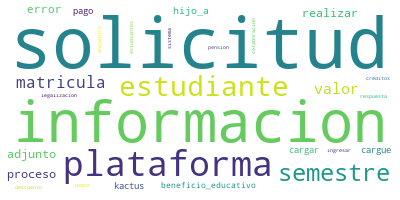

In [110]:
lista_mensajeuser=[]
for i in range(len(df_in)):
  lista_mensajeuser+=df_in[i]
long_string=''.join(lista_mensajeuser)
sal = pd.Series(long_string.split(' ')).value_counts()


sal2 = sal.reset_index()
sal2 = sal2.set_index('index')
saldic = sal2[0].to_dict()

#Creacion lista stop words
wordcloud = WordCloud(background_color="white",min_font_size=5, max_font_size=150, max_words=1000, contour_width=50, contour_color='steelblue', margin=15, 
                      stopwords=[])
#Crear el word cloud
#wordcloud.generate(long_string)
wordcloud.generate_from_frequencies(saldic)
# wordcloud.generate(saldic)
#Visualizar el word cloud
wordcloud.to_file('personal_patrones.png')
wordcloud.to_image()

In [111]:
segmento = str.upper("{}".format(name))
# Iniciar el count vectorizer con stop words personalizado en español
count_vectorizer = CountVectorizer(stop_words=[])
# Ajustar y transformar los términos procesados
count_data = count_vectorizer.fit_transform(df_in)
#Visualizar los términos mas comunes
x , y= plot_10_most_common_words(count_data, count_vectorizer)

In [112]:
pd.Series(df_in.map(lambda x : x.split(' ')).sum()).value_counts().head(15).index

Index(['solicitud', 'informacion', 'plataforma', 'estudiante', 'semestre',
       'matricula', 'adjunto', 'valor', 'realizar', 'proceso', 'error',
       'hijo_a', 'cargar', 'kactus', 'cargue'],
      dtype='object')

In [113]:
df_in.tolist()

['solicito activar agustiniano ciudad salitre cacs clave acceso modulo puedan ingresar alli datos educacion hijo_a s solicitud cacs cargar informacion aprobar respectivo respondieron clave activa entiendo solicitud activacion normalmente razones escasos recurso tramite realizo primera quincena empezar nada podido confirmamos pago decimo secundaria beneficiaria cancelo junto primera quincena  solicito activar agustiniano ciudad salitre cacs clave acceso modulo puedan ingresar alli datos educacion hijo_a s solicitud cacs cargar informacion aprobar respectivo respondieron clave activa entiendo solicitud activacion normalmente razones escasos recurso tramite realizo primera quincena empezar nada podido',
 'comunicacion dicen recibido informacion confirmamos desembolso beneficiario octavo secundaria cancelara junto segunda quincena  comunicacion dicen recibido informacion',
 'adjunto envio formato autorizacion habeas data actualizado fecha diligenciado firmado hijo_a beneficiaria convenio t

In [114]:
dw = list(sent_to_words(df_in))

In [115]:
dw

[['solicito',
  'activar',
  'agustiniano',
  'ciudad',
  'salitre',
  'cacs',
  'clave',
  'acceso',
  'modulo',
  'puedan',
  'ingresar',
  'alli',
  'datos',
  'educacion',
  'hijo_a',
  'solicitud',
  'cacs',
  'cargar',
  'informacion',
  'aprobar',
  'respectivo',
  'respondieron',
  'clave',
  'activa',
  'entiendo',
  'solicitud',
  'activacion',
  'normalmente',
  'razones',
  'escasos',
  'recurso',
  'tramite',
  'realizo',
  'primera',
  'quincena',
  'empezar',
  'nada',
  'podido',
  'confirmamos',
  'pago',
  'decimo',
  'secundaria',
  'beneficiaria',
  'cancelo',
  'junto',
  'primera',
  'quincena',
  'solicito',
  'activar',
  'agustiniano',
  'ciudad',
  'salitre',
  'cacs',
  'clave',
  'acceso',
  'modulo',
  'puedan',
  'ingresar',
  'alli',
  'datos',
  'educacion',
  'hijo_a',
  'solicitud',
  'cacs',
  'cargar',
  'informacion',
  'aprobar',
  'respectivo',
  'respondieron',
  'clave',
  'activa',
  'entiendo',
  'solicitud',
  'activacion',
  'normalmente',
 

In [116]:
len(dw)

1121

In [117]:
# @title Creación del Corpus
%%time

nlp = spacy.load('es_core_news_md')

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in swseg] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(dw, min_count=5, threshold=100))
trigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(bigram[dw], threshold=100))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in lista_stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#Definicion de segmento a analizar

# data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
# texts = data_lemmatized

data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
id2word = corpora.Dictionary(data_words_bigrams)

# texts = data_lemmatized
texts = data_words_bigrams



corpus = [id2word.doc2bow(text) for text in texts]

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



CPU times: user 21.5 s, sys: 680 ms, total: 22.2 s
Wall time: 22.2 s


In [118]:
# #@title Optimización del Modelo
# #Definicion del segmento persistente
# segmento = "Solucion"

# #Funcion de soporte
# def compute_coherence_values(corpus, dictionary, k, a, b):
    
#     lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=10, 
#                                            random_state=100,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha=a,
#                                            eta=b,
#                                            per_word_topics=True)
    
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
#     return coherence_model_lda.get_coherence()

# grid = {}
# grid['Validation_Set'] = {}

# #Rango de topicos
# min_topics = 2
# # max_topics = 11
# max_topics = 5
# step_size = 1
# topics_range = range(min_topics, max_topics, step_size)

# #Parametro Alpha
# alpha = list(np.arange(0.01, 1, 0.3))
# alpha.append('symmetric')
# alpha.append('asymmetric')

# #Parametro Beta
# beta = list(np.arange(0.01, 1, 0.3))
# beta.append('symmetric')

# #Conjuntos de validacion
# num_of_docs = len(corpus)
# corpus_sets = [corpus]

# corpus_title = ['100% Corpus']

# model_results = {'Validation_Set': [],
#                  'Topics': [],
#                  'Alpha': [],
#                  'Beta': [],
#                  'Coherence': []
#                 }

# #Intensivo en tiempo (Promedio de tiempo: 2 Horas)

# if 1 == 1:
#     pbar = tqdm.tqdm(total=540)
    
#     for i in range(len(corpus_sets)):
#         for k in topics_range:
#             for a in alpha:
#                 for b in beta:
#                     cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
#                                                   k=k, a=a, b=b)

#                     model_results['Validation_Set'].append(corpus_title[i])
#                     model_results['Topics'].append(k)
#                     model_results['Alpha'].append(a)
#                     model_results['Beta'].append(b)
#                     model_results['Coherence'].append(cv)
                    
#                     pbar.update(1)
#     pd.DataFrame(model_results).to_csv(segmento+'.csv', index=False)
#     pbar.close()

# #Persistencia de hiperparámetros
# model_results_tabc = pd.DataFrame(model_results)
# model_results_tabc.to_csv(segmento + '_model.csv')
# print("**", len(model_results_tabc), segmento, "\n")
# model_results_tabc.head()

# #Mejor Modelo
# model_results_tabc = pd.read_csv(segmento + '_model.csv')
# best_model = model_results_tabc[model_results_tabc.Coherence == model_results_tabc.Coherence.max()][:1]
# #display(best_model.head())

# #Hiperparámetros del mejor modelo
# Topics = int(best_model.Topics.item())
# Alpha = float(best_model.Alpha.item())
# Beta = float(best_model.Beta.item())

# print("HIPERPARÁMETROS DEL MODELO OPTIMIZADO:")
# print('\nNumero de Tópicos:', Topics)
# print('Parámetro Alfa:', Alpha)
# print('Parámetro Beta:', Beta)
# #esto estaba silenciado

In [119]:
#@title Modelo LDA Optimizado 
%%time
# se cambio la vesion de pylavis https://stackoverflow.com/questions/66123774/why-pyldavis-graph-does-not-display-topic-keywords-on-the-bar-chart
# import pyLDAvis.gensim
# %matplotlib inline
#Visualización del modelo
pyLDAvis.enable_notebook()
# pyLDAvis.enable_notebook(local=True)

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.909999999999999,
                                           eta=0.61,                                        
                                           per_word_topics=True)

#Visualizacion de los tópicos generados en el modelo LDA
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

#Prerrequisitos minimos para la representacion grafica del modelado de topicos
d = id2word
c = corpus
lda = lda_model

#Parametros de visualizacion
data = pyLDAvis.gensim.prepare(lda, c, d)

#Persistencia de resultados de modelado de tópicos
pyLDAvis.save_html(data, 'vis_' +name + '.html')
print('\n\n')
#Visualizacion
display(data)


[(0,
  '0.035*"estudiante" + 0.035*"matricula" + 0.035*"valor" + 0.025*"creditos" + '
  '0.017*"pension" + 0.016*"descuento" + 0.015*"plataforma" + '
  '0.014*"solicitud" + 0.012*"realizo" + 0.011*"periodo"'),
 (1,
  '0.047*"informacion" + 0.028*"solicitud" + 0.026*"plataforma" + '
  '0.021*"proceso" + 0.021*"error" + 0.019*"cargar" + 0.016*"estudiante" + '
  '0.015*"colaboracion" + 0.015*"adjunto" + 0.012*"ingresar"'),
 (2,
  '0.025*"solicitud" + 0.017*"semestre" + 0.015*"informacion" + 0.013*"hijo_a" '
  '+ 0.009*"respuesta" + 0.009*"pago" + 0.009*"aprobacion" + 0.008*"acuerdo" + '
  '0.008*"legalizacion" + 0.007*"tramite"')]





PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.103552  0.145577       1        1  48.211496
1     -0.095257 -0.149684       2        1  29.301664
0      0.198808  0.004106       3        1  22.486840, topic_info=             Term         Freq        Total Category  logprob  loglift
246         valor   429.000000   429.000000  Default  30.0000  30.0000
92      matricula   454.000000   454.000000  Default  29.0000  29.0000
64     estudiante   611.000000   611.000000  Default  28.0000  28.0000
20    informacion  1063.000000  1063.000000  Default  27.0000  27.0000
674      creditos   271.000000   271.000000  Default  26.0000  26.0000
..            ...          ...          ...      ...      ...      ...
203  colaboracion    71.420529   284.010866   Topic3  -5.0276   0.1118
141      escalado    65.938483   223.428487   Topic3  -5.1074   0.2719
321       posible    62.563666   177.499590   Topic3  -5.1600   0.4495
137         medio    59.227649   192.279637   Topic3  -5.2148   0.3147
171      semestre    66.149002   473.881941   Topic3  -5.1042  -0.4768

[217 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
756       1  0.362906    academico
756       2  0.009550    academico
756       3  0.620760    academico
379       1  0.948007      acuerdo
379       2  0.047879      acuerdo
...     ...       ...          ...
1912      2  0.032031  virtualidad
1912      3  0.960944  virtualidad
4034      1  0.046147         yuri
4034      2  0.922945         yuri
4034      3  0.046147         yuri

[463 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

CPU times: user 5.13 s, sys: 123 ms, total: 5.25 s
Wall time: 5.89 s


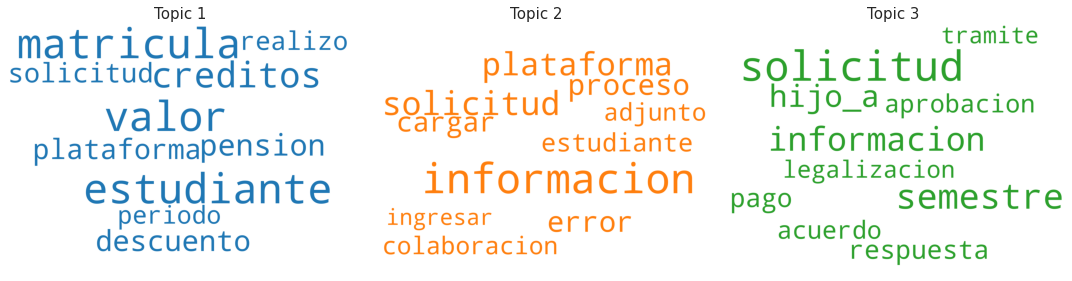

In [120]:
#@title Nubes de Palabras de los Términos clave N Principales en cada Tema
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=[],
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 3, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=15))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.savefig("personal_{}_topics_{}_results.png".format(name,i+1),bbox_inches = 'tight')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [121]:
#@title Red Semántica

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
#print(trigram_mod[bigram_mod[data_words[0]]])
# Funciones para bigrams, trigrams lemmatization
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#Aplicacion de las respectivas funciones
#Formacion de bigramas
data_words_bigrams = make_bigrams(data_words)

#Creacion del diccionario
id2word = corpora.Dictionary(data_words_bigrams)

# Creacion del Corpus
texts = data_words_bigrams

#Frecuencia termino documento
corpus = [id2word.doc2bow(text) for text in texts]

#VEMOS CUANTOS TERMINOS ESTAN EN NUESTRO DICCIONARIO Y CUALES SON LOS MÁS FRECUENTE
word_freq = defaultdict(int)
for sent in data_words_bigrams:
    for i in sent:
        word_freq[i] += 10
len(word_freq)

sorted(word_freq, key=word_freq.get, reverse=True)[50:100]

cores = multiprocessing.cpu_count()

##Entrenamiento del Modelo
w2v_model = Word2Vec(min_count=7, #SE CONSTRUYE EL VOCABULARIO A PARTIR DE LA FRECUENCIA DE APARICION QUE SE DEFINA AQUI
                     window=3,#SE AJUSTA EL NUMERO DE PALABRAS ATRAS Y ADELANTE DE LA PALABRA OBJETIVO PARA VECORIZARLA
                     size=30, #EL TAMANO DEL VECTOR DE CADA PALABRA
                     sample=1e-4, #-5 en principio #ESTE ES EL PARAMETRO QUE HAY QUE AJUSTAR, ES EL MAS SENSIBLE DEL MODELO
                     alpha=0.003, 
                     min_alpha=0.007, 
                     negative=10,
                     workers=cores-1)

#Construccion de vocabulario
w2v_model.build_vocab(data_words_bigrams, progress_per=10000)

#Entrenamiento del modelo
a=w2v_model.train(data_words_bigrams, total_examples=w2v_model.corpus_count, epochs=200, report_delay=1)

#Terminos similares
# w2v_model.wv.most_similar(positive=["contrasena"], topn=10)

##FUNCION PARA REDUCIR LA DIMENSION DEL ESPACIO DE PALABRAS Y PODER VISUALIZARLAS
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 30), dtype='f')
    word_labels = [word]
    color_list  = ["#25427B"] #a los colores de la campaña

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append("#33BBFF")
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append("#EBECED")
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    freq=[]
    for i in word_labels:
       freq.append(word_freq[i])

    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list,'freq':freq})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': df['freq'],
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ('+ df["words"][line].title()+','+str(df['freq'][line])+')',
                 horizontalalignment='left',
                 verticalalignment='top', size='small',
                 #color=df['color'][line],
                 color='black',
                 weight='normal'
                ).set_size(11)
    
    plt.axis(emit=True)
    plt.xlim(Y[:, 0].min()-10, Y[:, 0].max()+10)
    plt.ylim(Y[:, 1].min()-10, Y[:, 1].max()+30)
    plt.title('Visualización semántica para {}'.format(word.title()))

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



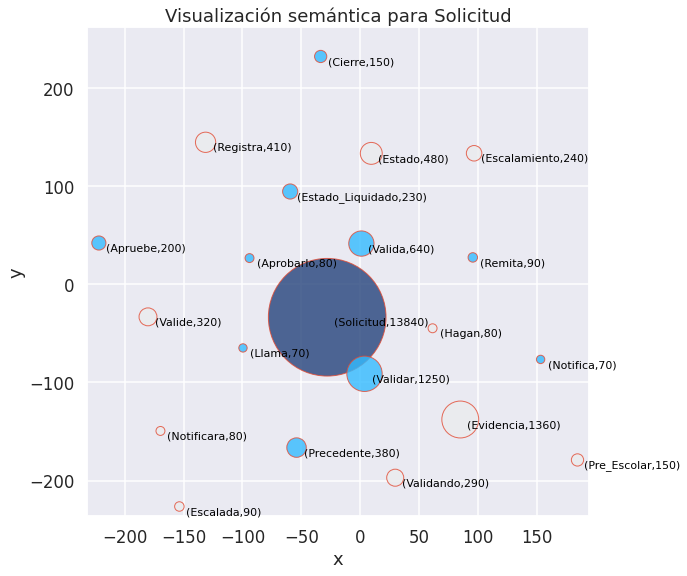

In [122]:
#@title
nombre = x[0]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')##

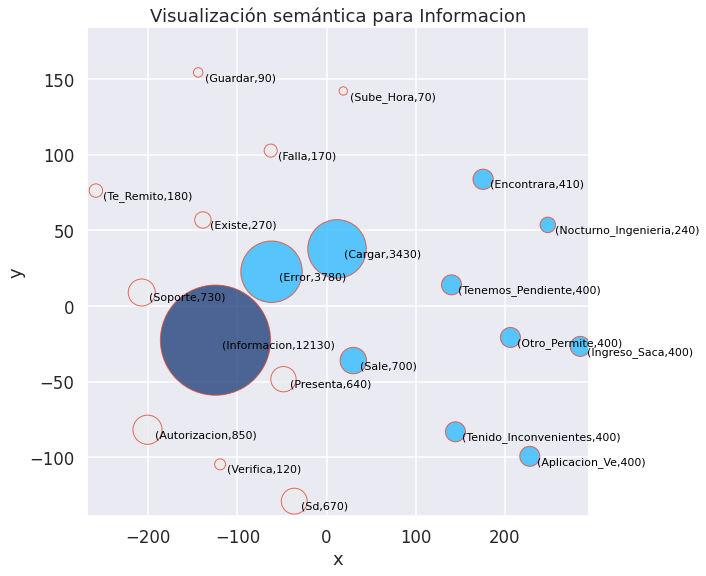

In [123]:
#@title


# tsnescatterplot(w2v_model, "activo", [t[0] for t in w2v_model.wv.most_similar(positive=["activo"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
#@title
nombre = x[1]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

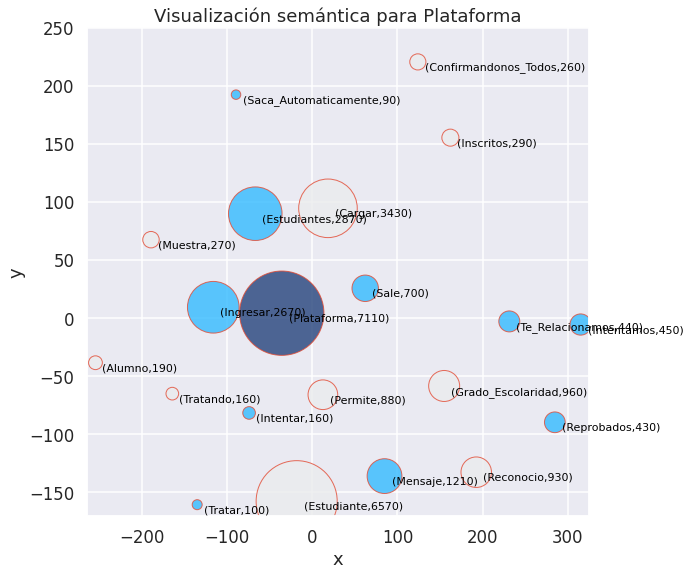

In [124]:
# @title 
#cuota se replaza por el temino clave que encontramos en las graficas de barras para 1-gramas
# tsnescatterplot(w2v_model, "confirmar", [t[0] for t in w2v_model.wv.most_similar(positive=["confirmar"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[2]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

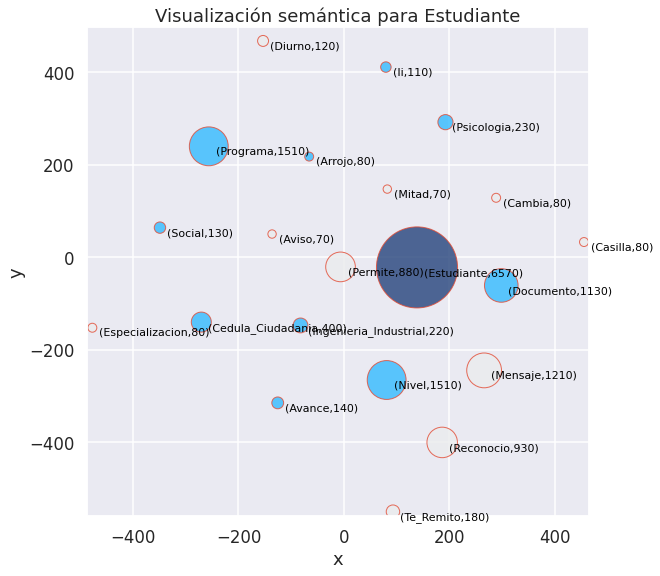

In [125]:
#@title
# tsnescatterplot(w2v_model, "actualizar", [t[0] for t in w2v_model.wv.most_similar(positive=["actualizar"], topn=20)][10:])
# plt.savefig("intereses_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
nombre = x[3]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

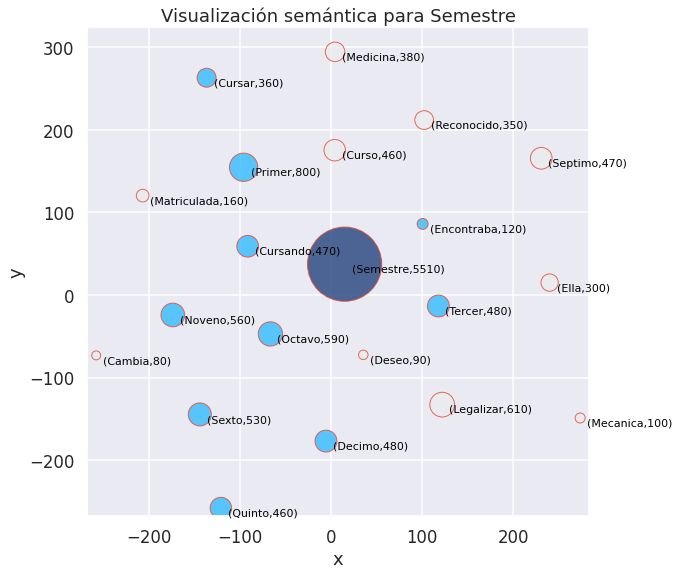

In [126]:
#@title
# tsnescatterplot(w2v_model, "codigo", [t[0] for t in w2v_model.wv.most_similar(positive=["codigo"], topn=20)][10:])
# plt.savefig("llegando_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[4]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

In [127]:
 word_vectors = w2v_model.wv
 word_vectors.save_word2vec_format('w2vecx_total_{}'.format(name))
 #Save model
from gensim.scripts.word2vec2tensor import word2vec2tensor 
word2vec2tensor('w2vecx_total_{}'.format(name), '{}_total_tensor00'.format(name))

In [128]:
#hacer version  con guines y sin guines que llos dijeron.